In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('train_genetic_disorders.csv')
print(df.shape)

df.head()

(22083, 45)


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [4]:
df = df.drop(['Patient Id', 'Patient First Name', 'Family Name', "Father's name"], axis = 1)

In [5]:
print(df.shape)
df.head()

(22083, 41)


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


# The Target Feature (Genetic Disorder)

In [6]:
df['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     9686
Single-gene inheritance diseases                7291
Multifactorial genetic inheritance disorders    1985
Name: Genetic Disorder, dtype: int64

In [7]:
df['Genetic Disorder'].isnull().sum()

3121

In [8]:
df = df.dropna(subset = ['Genetic Disorder'], axis = 0)

In [9]:
print(df.shape)

df.head()

(18962, 41)


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Massachusetts General Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,NaN,Normal,0.0,0.0,0.0,1.0,0.0,Yes,Low,Female,Not available,None,Institute,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis


In [10]:
df['Genetic Disorder'].isnull().sum()

0

# The Variable Types

In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Total number of numerical features: ", len(numerical_features))

print(numerical_features)

Total number of numerical features:  16
['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age", 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']


In [12]:
categorical_features = [feature for feature in df.columns if feature not in numerical_features and feature != 'Genetic Disorder']
print("Total number of categorical features: ", len(categorical_features))

print(categorical_features)

Total number of categorical features:  24
["Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Institute Name', 'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Place of birth', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result', 'Disorder Subclass']


# Missing Features

In [13]:
missing_features = [feature for feature in df.columns if df[feature].isnull().sum() > 0 and feature != 'Genetic Disorder']
print("Total number of missing features: ", len(missing_features))

print(missing_features)

Total number of missing features:  35
['Patient Age', 'Inherited from father', 'Maternal gene', "Mother's age", "Father's age", 'Institute Name', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Place of birth', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'No. of previous abortion', 'Birth defects', 'White Blood cell count (thousand per microliter)', 'Blood test result', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Disorder Subclass']


In [14]:
df[missing_features].isnull().mean().sort_values(ascending = False)

Mother's age                                        0.259519
Father's age                                        0.258570
Institute Name                                      0.221654
Maternal gene                                       0.122666
H/O substance abuse                                 0.095401
Symptom 2                                           0.095138
Disorder Subclass                                   0.095032
History of anomalies in previous pregnancies        0.094927
Test 5                                              0.094241
Follow-up                                           0.094188
Birth asphyxia                                      0.093872
Test 4                                              0.093239
Symptom 5                                           0.093239
White Blood cell count (thousand per microliter)    0.093028
Test 2                                              0.092764
Symptom 1                                           0.092764
Gender                  

<AxesSubplot:>

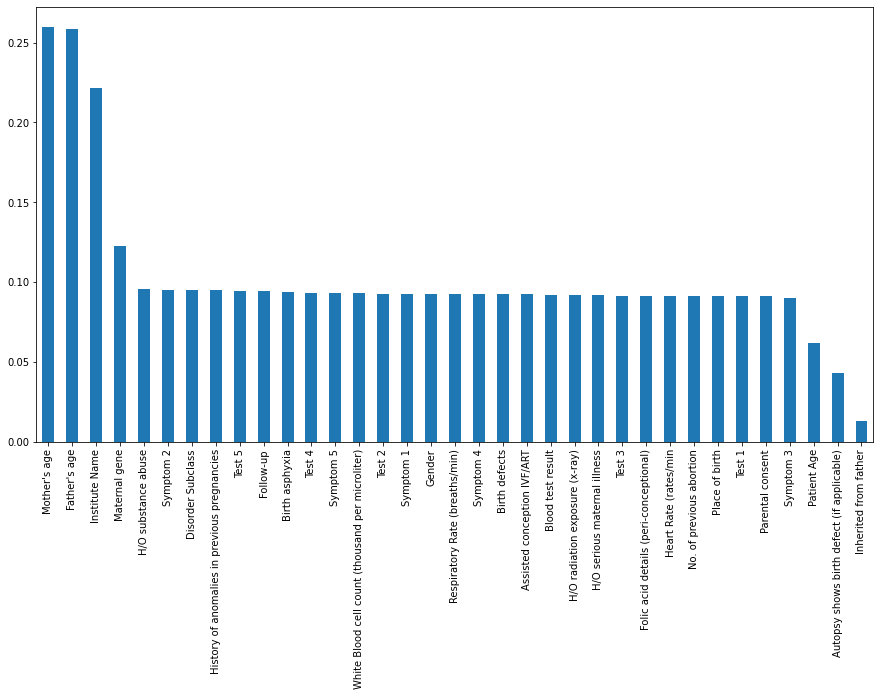

In [15]:
plt.figure(figsize=(15, 8))
df[missing_features].isnull().mean().sort_values(ascending = False).plot.bar()

In [16]:
print(df[missing_features].isnull().mean().sort_values(ascending = False).index.to_list()[4: 31])

find_common_na = df[missing_features].isnull().mean().sort_values(ascending = False).index.to_list()[4: 31]

['H/O substance abuse', 'Symptom 2', 'Disorder Subclass', 'History of anomalies in previous pregnancies', 'Test 5', 'Follow-up', 'Birth asphyxia', 'Test 4', 'Symptom 5', 'White Blood cell count (thousand per microliter)', 'Test 2', 'Symptom 1', 'Gender', 'Respiratory Rate (breaths/min)', 'Symptom 4', 'Birth defects', 'Assisted conception IVF/ART', 'Blood test result', 'H/O radiation exposure (x-ray)', 'H/O serious maternal illness', 'Test 3', 'Folic acid details (peri-conceptional)', 'Heart Rate (rates/min', 'No. of previous abortion', 'Place of birth', 'Test 1', 'Parental consent']


In [17]:
# 16 -> 18960, 17 -> '18948', 18 -> '18919', 19 -> '18847', 20 -> '18639 ', 21 -> '18076 ', 22 -> '16897', 23 -> '14967', 24 -> '12249'
# df[find_common_na].dropna(axis = 0, thresh=24)

# 26 -> 18961, 27 -> 18960, 28 -> 18953, 29 -> 18915 

# df = df.dropna(axis = 0, thresh = 29)

In [18]:
numerical_features_na = [feature for feature in missing_features if df[feature].dtype != 'O']
print("Total number of numerical missing features: ", len(numerical_features_na))

print(numerical_features_na)

Total number of numerical missing features:  15
['Patient Age', "Mother's age", "Father's age", 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']


In [19]:
categorical_features_na = [feature for feature in missing_features if feature not in numerical_features_na]
print("Total number of categorical missing features: ", len(categorical_features_na))

print(categorical_features_na)

Total number of categorical missing features:  20
['Inherited from father', 'Maternal gene', 'Institute Name', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Place of birth', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result', 'Disorder Subclass']


## Numerical Features

array([[<AxesSubplot:title={'center':'Patient Age'}>,
        <AxesSubplot:title={'center':'Blood cell count (mcL)'}>,
        <AxesSubplot:title={'center':"Mother's age"}>,
        <AxesSubplot:title={'center':"Father's age"}>],
       [<AxesSubplot:title={'center':'Test 1'}>,
        <AxesSubplot:title={'center':'Test 2'}>,
        <AxesSubplot:title={'center':'Test 3'}>,
        <AxesSubplot:title={'center':'Test 4'}>],
       [<AxesSubplot:title={'center':'Test 5'}>,
        <AxesSubplot:title={'center':'No. of previous abortion'}>,
        <AxesSubplot:title={'center':'White Blood cell count (thousand per microliter)'}>,
        <AxesSubplot:title={'center':'Symptom 1'}>],
       [<AxesSubplot:title={'center':'Symptom 2'}>,
        <AxesSubplot:title={'center':'Symptom 3'}>,
        <AxesSubplot:title={'center':'Symptom 4'}>,
        <AxesSubplot:title={'center':'Symptom 5'}>]], dtype=object)

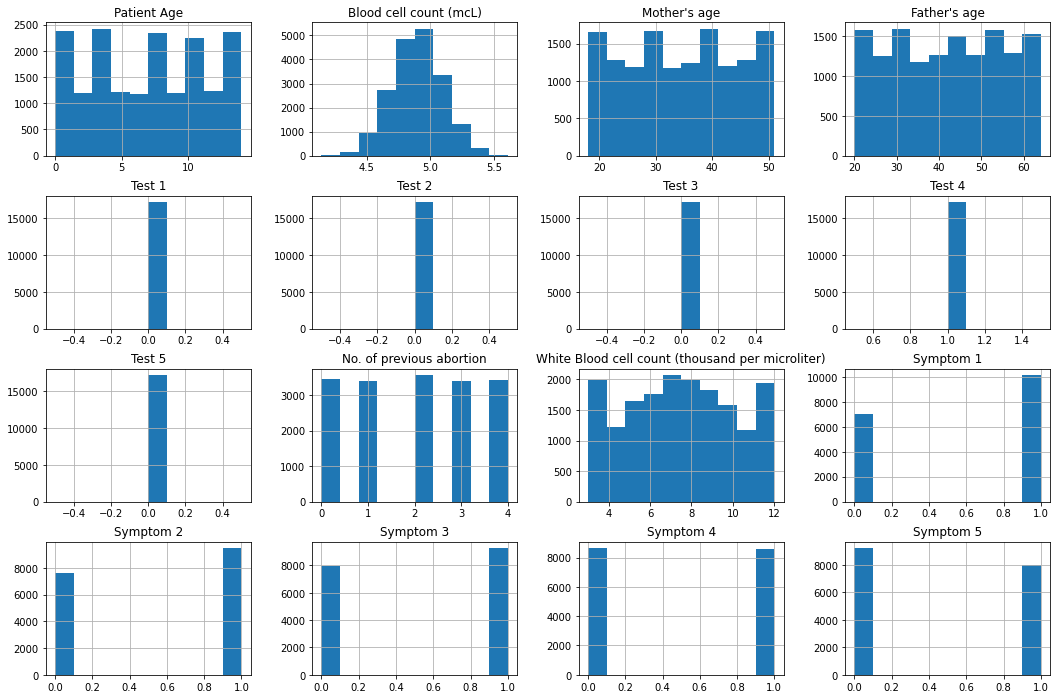

In [20]:
df[numerical_features].hist(figsize=(18, 12))

In [21]:
print(numerical_features)

['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age", 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']


In [22]:
# to_disc = ['Patient Age', "Mother's age", "Father's age", 'No. of previous abortion']

### 'Patient Age'

In [23]:
def plot_hist(df, feature):
    plt.figure(figsize=(8, 6))
    sns.histplot(data = df, x=feature, kde=True)

In [24]:
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualWidthDiscretiser

def plot_discretisation(X_train, X_test, features, method, show_dict = False, show_minmax = False, q = 10, bins = 10):
    
    if method == 'efd':
        disc = EqualFrequencyDiscretiser(variables=features, q = q)
    elif method == 'ewd':
        disc = EqualWidthDiscretiser(variables=features, bins = bins)
    
    disc.fit(X_train)
    
    X_train = disc.transform(X_train)
    X_test = disc.transform(X_test)
    
    if show_minmax:
        print('Min: ', df[features].min())
        print('Max: ', df[features].max())

    if show_dict:
        print(disc.binner_dict_)
    
    df1 = X_train.groupby(features)[features].count() / len(X_train)
    df2 = X_test.groupby(features)[features].count() / len(X_test)
    
    temp_data = pd.concat([df1, df2], axis = 1)
    temp_data.columns = ['train', 'test']
    
    temp_data.plot.bar()
    plt.ylabel("Total number of observations per bin")
    

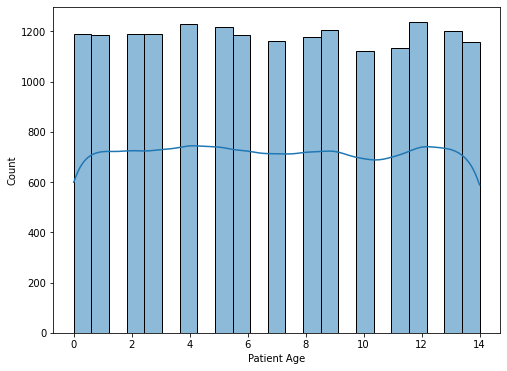

In [25]:
plot_hist(df, 'Patient Age')

In [26]:
print(df['Patient Age'].mean())
print(df['Patient Age'].median())
print(df['Patient Age'].mode()[0])

6.9737463458511355
7.0
12.0


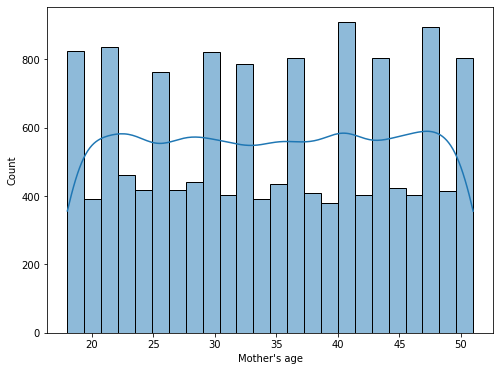

In [27]:
plot_hist(df, "Mother's age")

<AxesSubplot:>

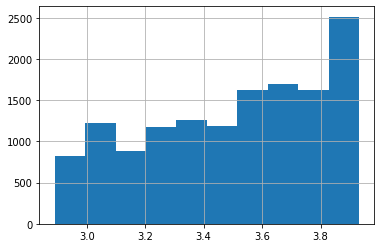

In [28]:
np.log(df["Mother's age"]).hist()

In [29]:
print(df["Mother's age"].mean())
print(df["Mother's age"].median())
print(df["Mother's age"].mode()[0])

34.54803788903924
35.0
40.0


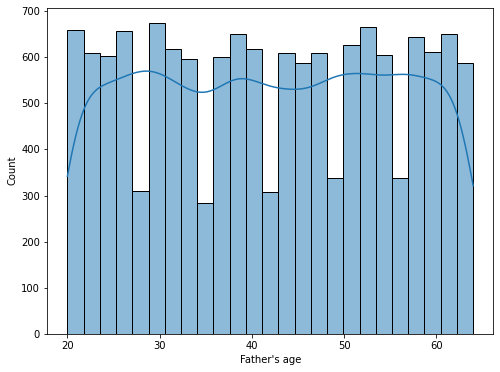

In [30]:
plot_hist(df, "Father's age")

In [31]:
print(df["Father's age"].mean())
print(df["Father's age"].median())
print(df["Father's age"].mode()[0])

41.9696279963013
42.0
20.0


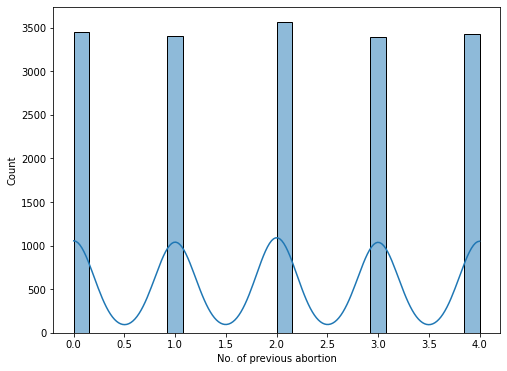

In [32]:
plot_hist(df, 'No. of previous abortion')

In [33]:
print(df['No. of previous abortion'].mean())
print(df['No. of previous abortion'].median())
print(df['No. of previous abortion'].mode()[0])

1.9977948003714021
2.0
2.0


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Genetic Disorder'], axis = 1),
                                                   df['Genetic Disorder'],
                                                   test_size=0.3,
                                                   random_state=22)

In [35]:
median_imputation = ['Patient Age', "Mother's age", "Father's age", 'No. of previous abortion']

X_train[median_imputation].isnull().sum()

Patient Age                  831
Mother's age                3450
Father's age                3426
No. of previous abortion    1218
dtype: int64

In [36]:
for feature in median_imputation:
    median = X_train[feature].median()
    
    X_train[feature] = X_train[feature].fillna(median)
    X_test[feature] = X_test[feature].fillna(median)

In [37]:
X_train[median_imputation].isnull().sum()

Patient Age                 0
Mother's age                0
Father's age                0
No. of previous abortion    0
dtype: int64

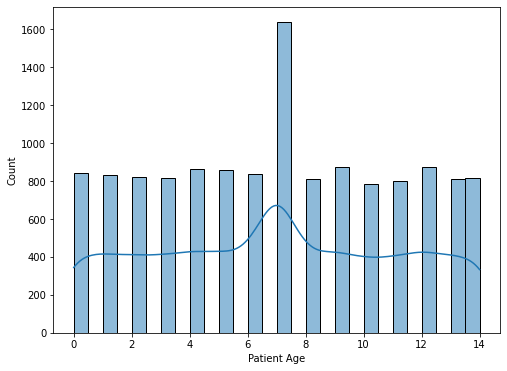

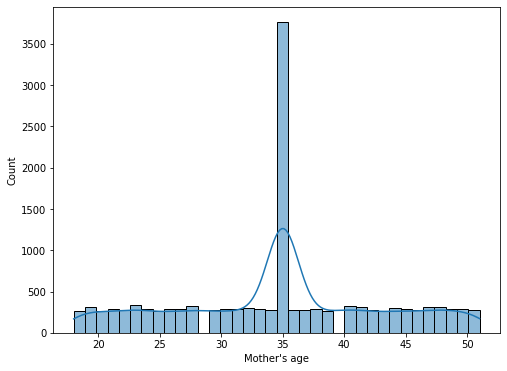

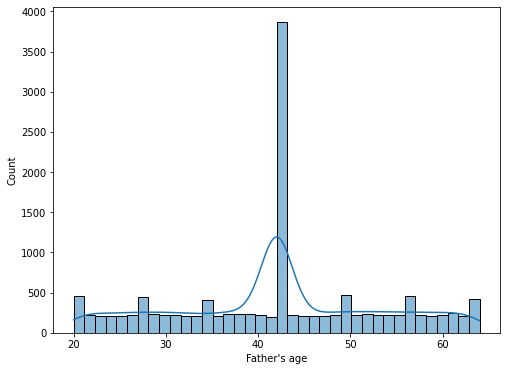

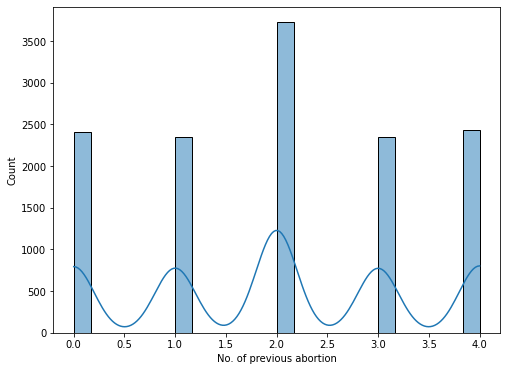

In [38]:
for feature in median_imputation:
    plot_hist(X_train, feature)

#### Random Sample Imputation (Check) ['Patient Age', "Mother's age", "Father's age", 'No. of previous abortion']

In [39]:
from feature_engine.imputation import RandomSampleImputer

random_imputation = ['Patient Age', "Mother's age", "Father's age", 'No. of previous abortion']

random_sample = RandomSampleImputer(variables=random_imputation, random_state=22)
random_sample.fit(X_train)

X_train = random_sample.transform(X_train)
X_test = random_sample.transform(X_test)

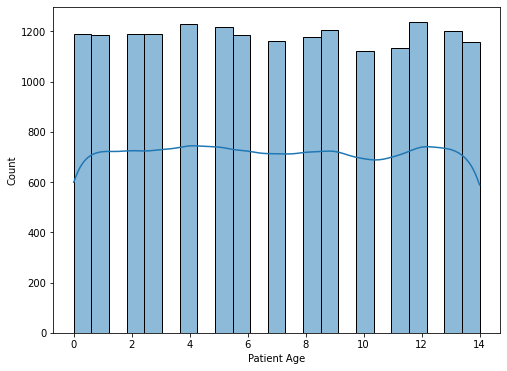

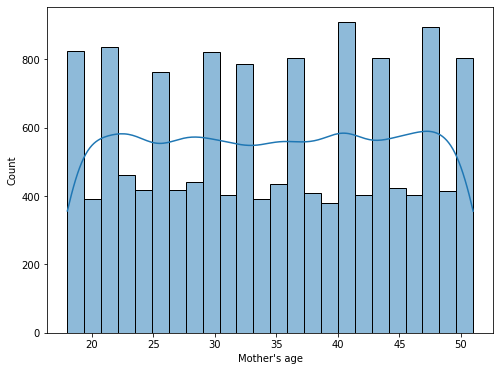

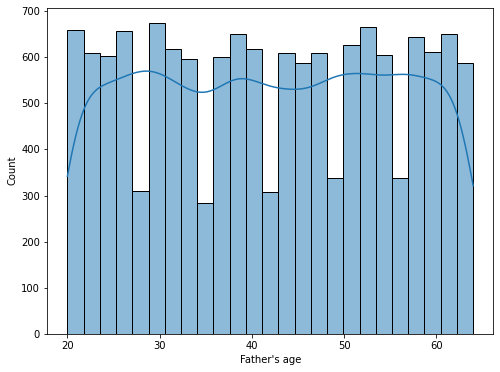

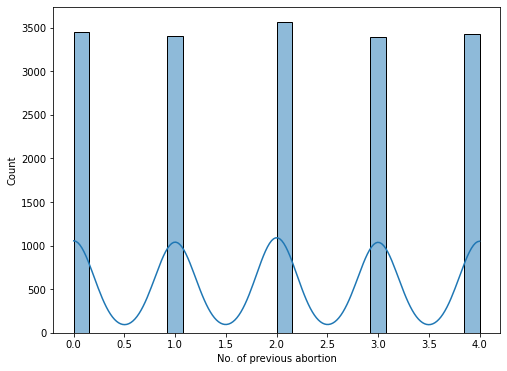

In [40]:
for feature in random_imputation:
    plot_hist(df, feature)

Min:  0.0
Max:  14.0
{'Patient Age': [-inf, 3.0, 6.0, 8.0, 11.0, inf]}


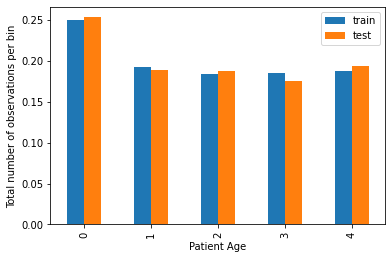

In [41]:
plot_discretisation(X_train, X_test, method='efd', features = 'Patient Age', q = 5, show_dict = True, show_minmax = True)

{'Patient Age': [-inf, 4.666666666666667, 9.333333333333334, inf]}


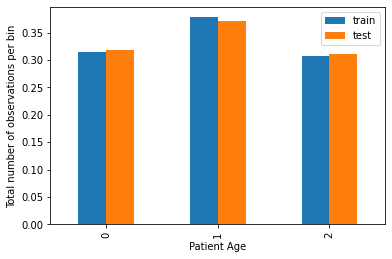

In [42]:
# Check
plot_discretisation(X_train, X_test, method='ewd', features = 'Patient Age', bins = 3, show_dict = True)

### "Mother's age"

Min:  18.0
Max:  51.0
{"Mother's age": [-inf, 33.0, 36.0, inf]}


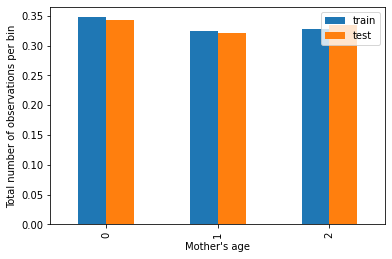

In [43]:
# Check
plot_discretisation(X_train, X_test, method = 'efd', features = "Mother's age", q = 3, show_dict = True, show_minmax = True)

Min:  18.0
Max:  51.0
{"Mother's age": [-inf, 29.0, 40.0, inf]}


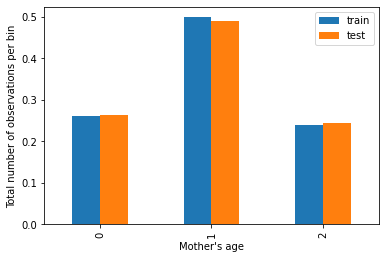

In [44]:
plot_discretisation(X_train, X_test, method = 'ewd', features = "Mother's age", bins = 3, show_dict = True, show_minmax = True)

### "Father's age"

Min:  20.0
Max:  64.0
{"Father's age": [-inf, 40.0, 44.0, inf]}


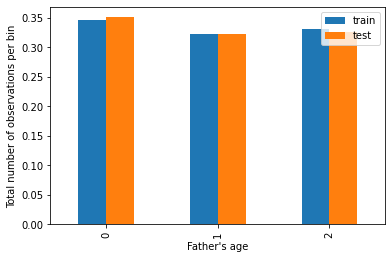

In [45]:
# Check
plot_discretisation(X_train, X_test, method = 'efd', features = "Father's age", q = 3, show_dict = True, show_minmax = True)

Min:  20.0
Max:  64.0
{"Father's age": [-inf, 27.333333333333332, 34.666666666666664, 42.0, 49.33333333333333, 56.666666666666664, inf]}


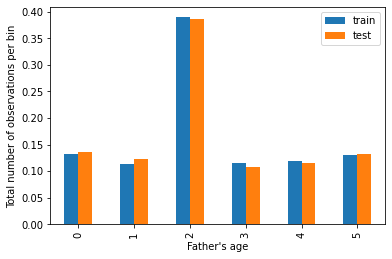

In [46]:
plot_discretisation(X_train, X_test, method = 'ewd', features = "Father's age", bins = 6, show_dict = True, show_minmax = True)

###  'No. of previous abortion'

Min:  0.0
Max:  4.0
{'No. of previous abortion': [-inf, 1.0, 2.0, 3.0, inf]}


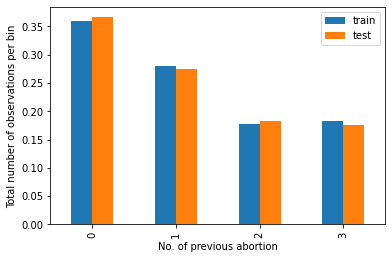

In [126]:
# Check
plot_discretisation(X_train, X_test, method = 'efd', features = 'No. of previous abortion', q = 4, show_dict = True, show_minmax = True)

Min:  0.0
Max:  4.0
{'No. of previous abortion': [-inf, 1.0, 2.0, 3.0, inf]}


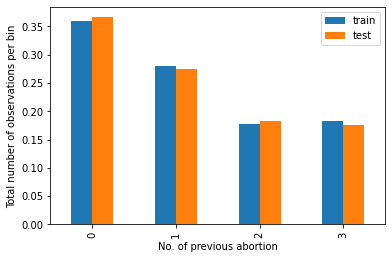

In [138]:
plot_discretisation(X_train, X_test, method = 'ewd', features = 'No. of previous abortion', bins = 4, show_dict = True, show_minmax = True)

### White Blood cell count (thousand per microliter)

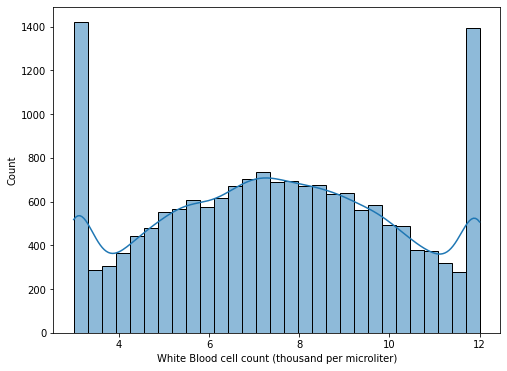

In [49]:
plot_hist(df, 'White Blood cell count (thousand per microliter)')

<AxesSubplot:xlabel='White Blood cell count (thousand per microliter)'>

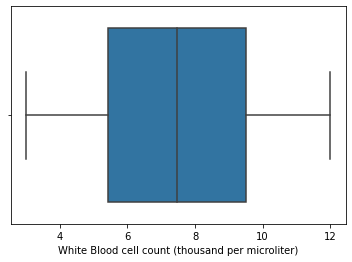

In [50]:
sns.boxplot(x = df['White Blood cell count (thousand per microliter)'])

((array([-3.9659384 , -3.74911915, -3.63044878, ...,  3.63044878,
          3.74911915,  3.9659384 ]),
  array([ 3.,  3.,  3., ..., nan, nan, nan])),
 (nan, nan, nan))

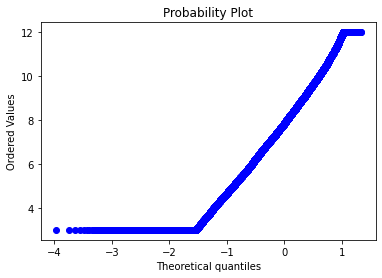

In [51]:
stats.probplot(df['White Blood cell count (thousand per microliter)'], dist='norm', plot=plt)

In [52]:
df['White Blood cell count (thousand per microliter)'].isnull().sum()

1764

In [53]:
print(df['White Blood cell count (thousand per microliter)'].mean())
print(df['White Blood cell count (thousand per microliter)'].median())
print(df['White Blood cell count (thousand per microliter)'].mode()[0])

7.478735312109373
7.465056402
3.0


In [54]:
median = df['White Blood cell count (thousand per microliter)'].median()

df['White Blood cell count (thousand per microliter)'] = df['White Blood cell count (thousand per microliter)'].fillna(median)

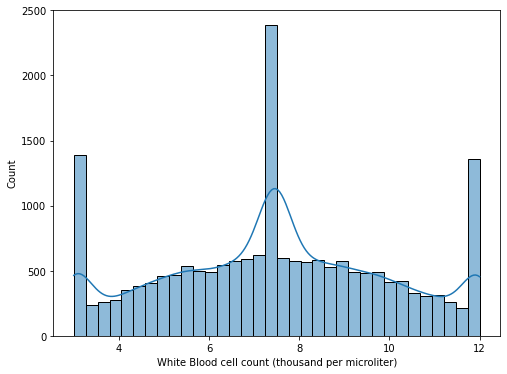

In [55]:
plot_hist(df, 'White Blood cell count (thousand per microliter)')

In [56]:
# Check
random_sample_wbc = RandomSampleImputer(variables=['White Blood cell count (thousand per microliter)'], random_state=22)
random_sample_wbc.fit(X_train)

X_train = random_sample_wbc.transform(X_train)
X_test = random_sample_wbc.transform(X_test)

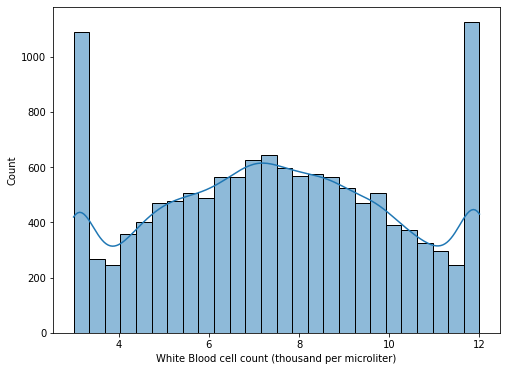

In [57]:
plot_hist(X_train, 'White Blood cell count (thousand per microliter)')

((array([-3.9659384 , -3.74911915, -3.63044878, ...,  3.63044878,
          3.74911915,  3.9659384 ]),
  array([ 3.,  3.,  3., ..., 12., 12., 12.])),
 (2.4854279485072, 7.477462788249394, 0.9845525602549703))

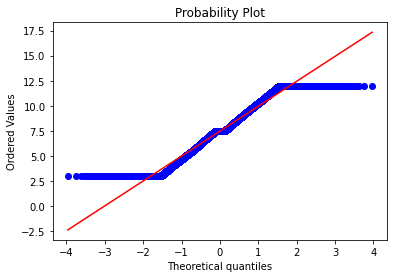

In [58]:
stats.probplot(df['White Blood cell count (thousand per microliter)'], dist='norm', plot=plt)

In [59]:
q3, q1 = np.percentile(df['White Blood cell count (thousand per microliter)'], [75, 25])
iqr = q3 - q1

low_lim = q1 - 0.5* iqr
up_lim = q3 + 0.5 * iqr

print('low_limit is', low_lim)
print('up_limit is', up_lim)
print()
outlier =[]
for x in df['White Blood cell count (thousand per microliter)']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Outliers in the dataset is', outlier)
print()
print("Total number of outliers: ", len(outlier))

low_limit is 3.8302726957499997
up_limit is 11.091927097750002

Outliers in the dataset is [3.0, 11.37353678, 12.0, 3.0, 3.0, 11.64866536, 3.0, 3.0, 3.0, 3.0, 3.49452766, 12.0, 3.0, 12.0, 11.69948111, 11.52798039, 11.96444156, 12.0, 12.0, 11.96661203, 3.103134174, 3.018465036, 12.0, 11.65945811, 12.0, 3.0, 12.0, 12.0, 3.235299172, 3.0, 11.59039001, 3.0, 11.23551444, 3.463177962, 12.0, 3.752489868, 3.0, 3.756223363, 3.585693578, 11.47660805, 11.83857908, 11.87663918, 3.540231921, 11.514665, 11.74735979, 3.45539522, 3.470917233, 3.0, 3.480522251, 12.0, 12.0, 3.0, 3.0, 3.0, 3.0, 11.53108655, 3.257668381, 3.0, 11.76692375, 12.0, 3.0, 3.0, 3.0, 12.0, 12.0, 3.0, 12.0, 11.09538667, 11.55580738, 3.0, 3.0, 11.53439776, 3.636614451, 3.0, 3.076384165, 3.258387179, 3.451265295, 11.39036381, 12.0, 12.0, 12.0, 3.0, 3.0, 3.0, 12.0, 12.0, 3.010220205, 11.90525935, 12.0, 3.0, 12.0, 3.535026363, 3.072105537, 3.0, 3.721415232, 11.09237493, 3.0, 11.233692, 3.0, 3.0, 11.4555069, 3.0, 12.0, 3.641160523, 3.4

Min:  3.0
Max:  12.0
{'White Blood cell count (thousand per microliter)': [-inf, 3.121112842, 4.326710386, 5.082983373, 5.752755052, 6.382413097, 6.943168161, 7.461858464, 8.017682536, 8.587454028, 9.187657786999997, 9.851073699, 10.70821157, 11.939935779999999, inf]}


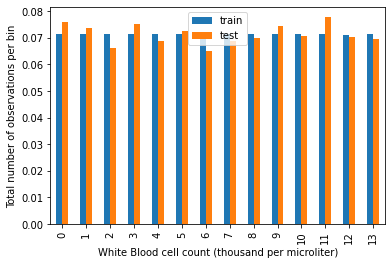

In [60]:
# Check
plot_discretisation(X_train, X_test, features = 'White Blood cell count (thousand per microliter)', method = 'efd', q = 14, show_dict=True, show_minmax = True)

In [61]:
df[['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']].head(10)

,Test 1,Test 2,Test 3,Test 4,Test 5
0,0.0,NaN,NaN,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,NaN,0.0,0.0,1.0,0.0
7,0.0,0.0,NaN,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0
10,NaN,0.0,0.0,NaN,0.0


In [62]:
df[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']].head(10)

,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,NaN
5,1.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,NaN,0.0
8,1.0,1.0,1.0,0.0,1.0
9,0.0,0.0,1.0,1.0,1.0
10,1.0,NaN,0.0,0.0,NaN


### no_of_tests (DIDN'T FILL MISSIN VALUES)

In [63]:
for feature in ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']:
    print(df[feature].fillna(9999).value_counts())

0.0       17236
9999.0     1726
Name: Test 1, dtype: int64
0.0       17203
9999.0     1759
Name: Test 2, dtype: int64
0.0       17229
9999.0     1733
Name: Test 3, dtype: int64
1.0       17194
9999.0     1768
Name: Test 4, dtype: int64
0.0       17175
9999.0     1787
Name: Test 5, dtype: int64


In [64]:
# df[['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']].dropna(axis=0, thresh=4)

In [65]:
# DIDN'T FILL MISSING VALUES - 1.0

df['no_of_test'] = df[['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']].sum(axis = 1)
df = df.drop(['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'], axis = 1)

In [66]:
df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,no_of_test
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,7.465056,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,1.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer,1.0
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Massachusetts General Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,NaN,Normal,Yes,Low,Female,Not available,None,Institute,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis,1.0


### no_of_symptoms (DIDN'T FILL MISSIN VALUES)

In [67]:
# DIDN'T FILL MISSING VALUES - 1.0

df['no_of_symptoms'] = df[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']].sum(axis = 1)

df = df.drop(['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'], axis = 1)

In [68]:
df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder,Disorder Subclass,no_of_test,no_of_symptoms
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,1.0,5.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,7.465056,normal,Multifactorial genetic inheritance disorders,Diabetes,1.0,4.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome,1.0,1.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,Multifactorial genetic inheritance disorders,Cancer,1.0,0.0
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Massachusetts General Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,NaN,Normal,Yes,Low,Female,Not available,None,Institute,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,Single-gene inheritance diseases,Cystic fibrosis,1.0,2.0


In [69]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Total number of numerical features: ", len(numerical_features))

print(numerical_features)

Total number of numerical features:  8
['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'no_of_test', 'no_of_symptoms']


In [70]:
df[numerical_features].isnull().mean().sort_values(ascending=False)

Mother's age                                        0.259519
Father's age                                        0.258570
No. of previous abortion                            0.091235
Patient Age                                         0.061913
Blood cell count (mcL)                              0.000000
White Blood cell count (thousand per microliter)    0.000000
no_of_test                                          0.000000
no_of_symptoms                                      0.000000
dtype: float64

In [71]:
print(df.shape)
df.head()

(18962, 33)


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder,Disorder Subclass,no_of_test,no_of_symptoms
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,1.0,5.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,7.465056,normal,Multifactorial genetic inheritance disorders,Diabetes,1.0,4.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome,1.0,1.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,Multifactorial genetic inheritance disorders,Cancer,1.0,0.0
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Massachusetts General Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,NaN,Normal,Yes,Low,Female,Not available,None,Institute,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,Single-gene inheritance diseases,Cystic fibrosis,1.0,2.0


## Categorical Features

In [72]:
print(categorical_features)

["Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Institute Name', 'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Place of birth', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result', 'Disorder Subclass']


In [73]:
df[categorical_features_na].isnull().mean().sort_values(ascending=False)

Institute Name                                  0.221654
Maternal gene                                   0.122666
H/O substance abuse                             0.095401
Disorder Subclass                               0.095032
History of anomalies in previous pregnancies    0.094927
Follow-up                                       0.094188
Birth asphyxia                                  0.093872
Gender                                          0.092395
Respiratory Rate (breaths/min)                  0.092290
Birth defects                                   0.092237
Assisted conception IVF/ART                     0.092184
Blood test result                               0.091762
H/O serious maternal illness                    0.091710
H/O radiation exposure (x-ray)                  0.091710
Folic acid details (peri-conceptional)          0.091393
Heart Rate (rates/min                           0.091235
Place of birth                                  0.091130
Parental consent               

### 'Institute Name': Add Missing Indicator

<AxesSubplot:>

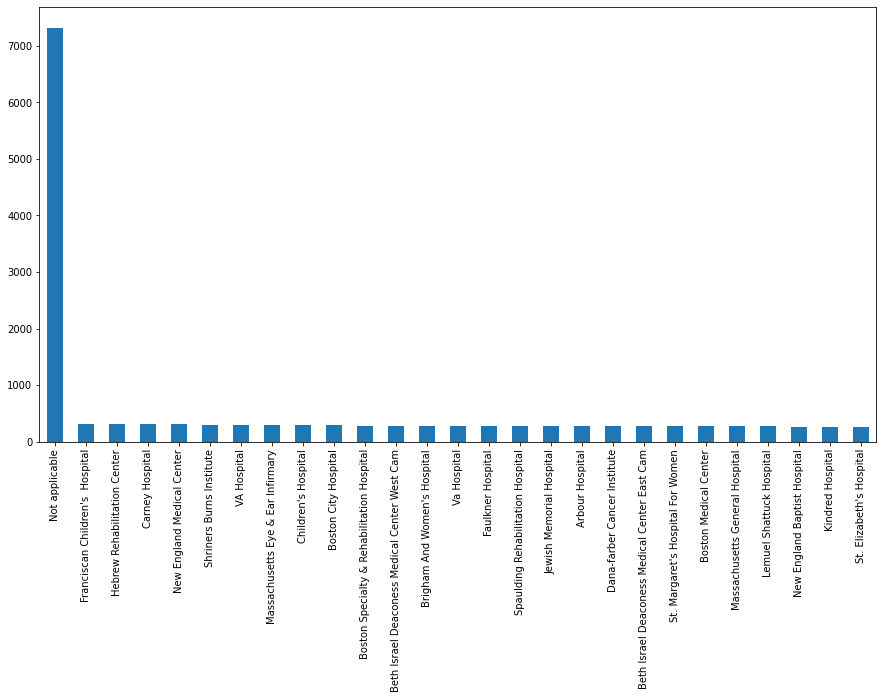

In [74]:
plt.figure(figsize=(15, 8))
df['Institute Name'].value_counts().plot.bar()

In [75]:
df['Institute Name'].value_counts()

Not applicable                                   7319
Franciscan Children's  Hospital                   314
Hebrew Rehabilitation Center                      314
Carney Hospital                                   313
New England Medical Center                        309
Shriners Burns Institute                          298
VA Hospital                                       296
Massachusetts Eye & Ear Infirmary                 293
Children's Hospital                               290
Boston City Hospital                              289
Boston Specialty & Rehabilitation Hospital        288
Beth Israel Deaconess Medical Center West Cam     286
Brigham And Women's Hospital                      285
Va Hospital                                       284
Faulkner Hospital                                 283
Spaulding Rehabilitation Hospital                 282
Jewish Memorial Hospital                          281
Arbour Hospital                                   281
Dana-farber Cancer Institute

In [76]:
df['Institute Name'].value_counts().values[1:].sum()

7440

In [77]:
df['Institution_Applicability'] = np.where(df['Institute Name'] == 'Not applicable', 'Not applicable', np.where(df['Institute Name'].isna(), np.nan, 'Applicable'))
df = df.drop(['Institute Name'], axis = 1)
df['Institution_Applicability_na'] = np.where(df['Institution_Applicability'] == 'nan', 'Missing', df['Institution_Applicability'])

In [139]:
df['Institution_Applicability_na'].unique()

array(['Applicable', 'Missing', 'Not applicable'], dtype=object)

### 'Maternal gene': fillna() -> Yes

In [79]:
df['Maternal gene'].value_counts()

Yes    9191
No     7445
Name: Maternal gene, dtype: int64

In [80]:
df['Maternal gene'].isna().sum()

2326

In [81]:
df['Maternal gene'] = df['Maternal gene'].fillna('Yes')

In [82]:
df['Maternal gene'].isna().sum()

0

### 'H/O substance abuse': convert nan's to '-' and convert '-' to 'Missing'

In [83]:
df['H/O substance abuse'].value_counts()

No                4373
-                 4328
Yes               4301
Not applicable    4151
Name: H/O substance abuse, dtype: int64

In [84]:
df['H/O substance abuse'].isna().sum()

1809

In [85]:
df['H/O substance abuse'] = np.where(df['H/O substance abuse'].isna(), '-', df['H/O substance abuse'])

In [86]:
df['H/O substance abuse'].value_counts()

-                 6137
No                4373
Yes               4301
Not applicable    4151
Name: H/O substance abuse, dtype: int64

In [87]:
df['H/O substance abuse'] = np.where(df['H/O substance abuse'] == '-', 'Missing', df['H/O substance abuse'])

In [88]:
df['H/O substance abuse'].value_counts()

Missing           6137
No                4373
Yes               4301
Not applicable    4151
Name: H/O substance abuse, dtype: int64

### Inherited from father: Fillna() -> Yes

In [89]:
df['Inherited from father'].value_counts()

No     11293
Yes     7423
Name: Inherited from father, dtype: int64

In [90]:
df['Inherited from father'].isna().sum()

246

In [91]:
df['Inherited from father'] = df['Inherited from father'].fillna('Yes')

In [92]:
df['Inherited from father'].isna().sum()

0

### Autopsy shows birth defect (if applicable): Fillna() -> None

In [93]:
df['Autopsy shows birth defect (if applicable)'].value_counts()

Not applicable    9543
Yes               2929
None              2921
No                2755
Name: Autopsy shows birth defect (if applicable), dtype: int64

In [94]:
df['Autopsy shows birth defect (if applicable)'].isna().sum()

814

In [95]:
df['Autopsy shows birth defect (if applicable)'] = df['Autopsy shows birth defect (if applicable)'].fillna('None')

In [96]:
df['Autopsy shows birth defect (if applicable)'].isna().sum()

0

In [97]:
to_remove = ['Institute Name', 'Maternal gene', 'H/O substance abuse', 'Inherited from father', 'Autopsy shows birth defect (if applicable)']

for feature in to_remove:
    categorical_features.remove(feature)

In [98]:
categorical_features

["Genes in mother's side",
 'Paternal gene',
 'Location of Institute',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result',
 'Disorder Subclass']

In [99]:
for feature in categorical_features:
    print(feature)
    print(df[feature].value_counts())
    
    print()

Genes in mother's side
Yes    11268
No      7694
Name: Genes in mother's side, dtype: int64

Paternal gene
No     10735
Yes     8227
Name: Paternal gene, dtype: int64

Location of Institute
-                                                                                            9366
125 PARKER HILL AV\nJAMAICA PLAIN, MA 02120\n(42.329611374844326, -71.10616871232227)         718
249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912172521, -71.08168028446168)                     408
2100 DORCHESTER AV\nDORCHESTER, MA 02124\n(42.27854306401838, -71.06631280050811)             406
1200 Centre St\nRoslindale, MA 02131\n(42.29738386053219, -71.13150465441208)                 395
75 FRANCIS ST\nFENWAY/KENMORE, MA 02115\n(42.33587602903896, -71.10741054246668)              389
59 TOWNSEND ST\nROXBURY, MA 02119\n(42.31856289432221, -71.09165569529381)                    386
1400 VFW Parkway\nWest Roxbury, MA 02132\n(42.27598935537618, -71.17245195460838)             386
51 BLOSSOM ST\nCENTRAL, MA

### Location of Institute

In [100]:
print(df['Location of Institute'][0])

55 FRUIT ST
CENTRAL, MA 02114
(42.36247485742686, -71.06924724545246)


In [101]:
# import module
from geopy.geocoders import Nominatim

In [102]:
lat = '42.36247485742686'
long = '-71.06924724545246'

# initialize Nominatim API 
geolocator = Nominatim(user_agent="geoapiExercises")

location = geolocator.reverse(lat+","+long)

address = location.raw['address']

city = address.get('city', '')
state = address.get('state', '')
country = address.get('country', '')
code = address.get('country_code')
zipcode = address.get('postcode')

print('City : ',city)
print('State : ',state)
print('Country : ',country)
print('Zip Code : ', zipcode)

City :  Boston
State :  Massachusetts
Country :  United States
Zip Code :  02114


In [103]:
df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder,Disorder Subclass,no_of_test,no_of_symptoms,Institution_Applicability,Institution_Applicability_na
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,1.0,5.0,Applicable,Applicable
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,-,Alive,Normal (30-60),Tachycardia,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,Missing,Yes,Yes,4.0,Singular,7.465056,normal,Multifactorial genetic inheritance disorders,Diabetes,1.0,4.0,nan,Missing
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome,1.0,1.0,nan,Missing
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,NaN,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,Multifactorial genetic inheritance disorders,Cancer,1.0,0.0,Applicable,Applicable
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,NaN,Normal,Yes,Low,Female,Not available,None,Institute,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,Single-gene inheritance diseases,Cystic fibrosis,1.0,2.0,Applicable,Applicable


In [104]:
for index in df.index.to_list():
    lat_long_list = df['Location of Institute'][index].split('\n')[-1].replace('(', '').replace(')', '').split(',')
    if len(lat_long_list) == 2:
        print(index, lat_long_list)
    else:
        print(index, lat_long_list)

0 ['42.36247485742686', ' -71.06924724545246']
2 ['-']
3 ['42.36247485742686', ' -71.06924724545246']
4 ['42.337592548462226', ' -71.10472284437952']
5 ['42.36247485742686', ' -71.06924724545246']
6 ['-']
7 ['-']
8 ['42.36764789068138', ' -71.06564730220646']
9 ['42.29738386053219', ' -71.13150465441208']
10 ['-']
11 ['-']
12 ['-']
14 ['-']
15 ['-']
16 ['42.329611374844326', ' -71.10616871232227']
17 ['-']
18 ['42.33734993862189', ' -71.1071702648531']
19 ['42.27137912172521', ' -71.08168028446168']
20 ['-']
21 ['42.31617666213941', ' -71.11272670363542']
22 ['42.335925371008436', ' -71.07378404269969']
23 ['-']
24 ['-']
25 ['42.31617666213941', ' -71.11272670363542']
26 ['42.314030311294516', ' -71.06406449543488']
27 ['42.3371094801158', ' -71.07139912234962']
28 ['42.29738386053219', ' -71.13150465441208']
29 ['-']
30 ['-']
31 ['42.337592548462226', ' -71.10472284437952']
32 ['-']
33 ['42.27137912172521', ' -71.08168028446168']
34 ['-']
35 ['-']
36 ['42.34665771451756', ' -71.141361

1402 ['-']
1403 ['-']
1404 ['42.30025000839615', ' -71.10737910445549']
1405 ['42.314030311294516', ' -71.06406449543488']
1406 ['42.349946522039204', ' -71.0634111017112']
1407 ['42.314030311294516', ' -71.06406449543488']
1408 ['42.3438499996779', ' -71.08983000035408']
1409 ['42.329611374844326', ' -71.10616871232227']
1411 ['42.33587602903896', ' -71.10741054246668']
1412 ['42.335925371008436', ' -71.07378404269969']
1413 ['42.27854306401838', ' -71.06631280050811']
1414 ['-']
1415 ['42.36764789068138', ' -71.06564730220646']
1416 ['-']
1417 ['42.3438499996779', ' -71.08983000035408']
1418 ['-']
1419 ['42.329611374844326', ' -71.10616871232227']
1420 ['-']
1421 ['42.27854306401838', ' -71.06631280050811']
1422 ['42.29738386053219', ' -71.13150465441208']
1423 ['42.36764789068138', ' -71.06564730220646']
1424 ['-']
1425 ['-']
1426 ['-']
1427 ['-']
1428 ['-']
1429 ['-']
1430 ['42.29738386053219', ' -71.13150465441208']
1431 ['42.36247485742686', ' -71.06924724545246']
1432 ['42.35262

1947 ['-']
1948 ['42.33587602903896', ' -71.10741054246668']
1949 ['-']
1950 ['42.3438499996779', ' -71.08983000035408']
1951 ['-']
1952 ['-']
1953 ['-']
1954 ['-']
1955 ['42.314030311294516', ' -71.06406449543488']
1956 ['-']
1957 ['-']
1958 ['42.36764789068138', ' -71.06564730220646']
1959 ['-']
1960 ['42.3438499996779', ' -71.08983000035408']
1961 ['-']
1962 ['-']
1963 ['42.34665771451756', ' -71.14136122385321']
1964 ['-']
1965 ['-']
1967 ['-']
1968 ['-']
1969 ['-']
1970 ['-']
1971 ['-']
1972 ['42.349656455743144', ' -71.14822103232248']
1973 ['-']
1974 ['-']
1975 ['42.352620000312925', ' -71.13281000028115']
1976 ['-']
1977 ['42.27854306401838', ' -71.06631280050811']
1979 ['42.33734993862189', ' -71.1071702648531']
1980 ['-']
1981 ['-']
1982 ['42.329611374844326', ' -71.10616871232227']
1983 ['-']
1984 ['-']
1985 ['-']
1986 ['-']
1987 ['42.3371094801158', ' -71.07139912234962']
1988 ['42.335925371008436', ' -71.07378404269969']
1989 ['-']
1990 ['42.30025000839615', ' -71.10737910

3342 ['-']
3343 ['42.3385289546495', ' -71.10940050507557']
3344 ['-']
3346 ['42.30021828265608', ' -71.12789683059322']
3348 ['-']
3349 ['42.335925371008436', ' -71.07378404269969']
3350 ['-']
3351 ['-']
3352 ['-']
3353 ['42.31617666213941', ' -71.11272670363542']
3354 ['42.314030311294516', ' -71.06406449543488']
3355 ['-']
3356 ['-']
3357 ['-']
3358 ['-']
3359 ['42.352620000312925', ' -71.13281000028115']
3360 ['42.36297141612903', ' -71.07043169540236']
3361 ['42.337592548462226', ' -71.10472284437952']
3362 ['-']
3363 ['42.27137912172521', ' -71.08168028446168']
3364 ['42.329611374844326', ' -71.10616871232227']
3365 ['42.329611374844326', ' -71.10616871232227']
3366 ['-']
3367 ['42.36297141612903', ' -71.07043169540236']
3368 ['42.335925371008436', ' -71.07378404269969']
3369 ['-']
3370 ['-']
3371 ['42.27854306401838', ' -71.06631280050811']
3372 ['-']
3373 ['42.314030311294516', ' -71.06406449543488']
3374 ['42.3385289546495', ' -71.10940050507557']
3375 ['-']
3376 ['-']
3377 ['

3947 ['42.349656455743144', ' -71.14822103232248']
3948 ['-']
3949 ['-']
3950 ['42.31617666213941', ' -71.11272670363542']
3953 ['42.31617666213941', ' -71.11272670363542']
3955 ['-']
3956 ['-']
3957 ['42.27137912172521', ' -71.08168028446168']
3958 ['42.33587602903896', ' -71.10741054246668']
3959 ['-']
3960 ['42.36327718561898', ' -71.0668523937257']
3961 ['42.329611374844326', ' -71.10616871232227']
3962 ['-']
3963 ['-']
3965 ['42.314030311294516', ' -71.06406449543488']
3966 ['42.349656455743144', ' -71.14822103232248']
3967 ['-']
3968 ['42.314030311294516', ' -71.06406449543488']
3969 ['42.349946522039204', ' -71.0634111017112']
3970 ['-']
3971 ['42.352620000312925', ' -71.13281000028115']
3973 ['42.31856289432221', ' -71.09165569529381']
3974 ['42.314030311294516', ' -71.06406449543488']
3975 ['42.33587602903896', ' -71.10741054246668']
3976 ['42.27854306401838', ' -71.06631280050811']
3977 ['-']
3978 ['42.29738386053219', ' -71.13150465441208']
3979 ['-']
3980 ['42.3676478906813

5274 ['42.352620000312925', ' -71.13281000028115']
5275 ['42.352620000312925', ' -71.13281000028115']
5276 ['-']
5277 ['42.349946522039204', ' -71.0634111017112']
5278 ['-']
5279 ['-']
5280 ['42.30025000839615', ' -71.10737910445549']
5281 ['42.3371094801158', ' -71.07139912234962']
5282 ['-']
5283 ['42.349656455743144', ' -71.14822103232248']
5285 ['42.34665771451756', ' -71.14136122385321']
5286 ['42.314030311294516', ' -71.06406449543488']
5287 ['42.329611374844326', ' -71.10616871232227']
5288 ['42.314030311294516', ' -71.06406449543488']
5289 ['42.27854306401838', ' -71.06631280050811']
5290 ['-']
5291 ['-']
5293 ['42.335925371008436', ' -71.07378404269969']
5294 ['42.29738386053219', ' -71.13150465441208']
5295 ['42.349946522039204', ' -71.0634111017112']
5296 ['42.349656455743144', ' -71.14822103232248']
5297 ['-']
5298 ['42.31856289432221', ' -71.09165569529381']
5299 ['42.36247485742686', ' -71.06924724545246']
5300 ['42.3385289546495', ' -71.10940050507557']
5301 ['-']
5302 [

6111 ['-']
6112 ['-']
6113 ['-']
6114 ['42.3438499996779', ' -71.08983000035408']
6115 ['42.33734993862189', ' -71.1071702648531']
6116 ['42.33734993862189', ' -71.1071702648531']
6117 ['42.27854306401838', ' -71.06631280050811']
6118 ['42.31856289432221', ' -71.09165569529381']
6119 ['-']
6120 ['42.329611374844326', ' -71.10616871232227']
6121 ['-']
6122 ['-']
6123 ['-']
6125 ['-']
6126 ['42.30025000839615', ' -71.10737910445549']
6127 ['42.34665771451756', ' -71.14136122385321']
6128 ['42.3438499996779', ' -71.08983000035408']
6129 ['-']
6130 ['42.29738386053219', ' -71.13150465441208']
6131 ['42.31856289432221', ' -71.09165569529381']
6132 ['-']
6133 ['-']
6134 ['-']
6135 ['42.36297141612903', ' -71.07043169540236']
6136 ['-']
6137 ['-']
6139 ['-']
6140 ['42.31856289432221', ' -71.09165569529381']
6141 ['42.30025000839615', ' -71.10737910445549']
6142 ['-']
6143 ['-']
6144 ['42.3385289546495', ' -71.10940050507557']
6145 ['42.33587602903896', ' -71.10741054246668']
6146 ['42.3466577

7502 ['42.31856289432221', ' -71.09165569529381']
7503 ['-']
7504 ['42.3438499996779', ' -71.08983000035408']
7505 ['42.36297141612903', ' -71.07043169540236']
7506 ['42.314030311294516', ' -71.06406449543488']
7507 ['42.36297141612903', ' -71.07043169540236']
7508 ['-']
7509 ['42.33734993862189', ' -71.1071702648531']
7510 ['-']
7512 ['-']
7513 ['42.314030311294516', ' -71.06406449543488']
7515 ['-']
7517 ['-']
7519 ['42.3371094801158', ' -71.07139912234962']
7520 ['-']
7522 ['42.3371094801158', ' -71.07139912234962']
7523 ['42.27854306401838', ' -71.06631280050811']
7525 ['-']
7526 ['42.352620000312925', ' -71.13281000028115']
7527 ['42.33734993862189', ' -71.1071702648531']
7528 ['42.337592548462226', ' -71.10472284437952']
7529 ['42.329611374844326', ' -71.10616871232227']
7530 ['42.3385289546495', ' -71.10940050507557']
7532 ['42.31617666213941', ' -71.11272670363542']
7533 ['-']
7534 ['42.3371094801158', ' -71.07139912234962']
7535 ['42.314030311294516', ' -71.06406449543488']
75

8349 ['-']
8350 ['-']
8351 ['-']
8352 ['42.329611374844326', ' -71.10616871232227']
8353 ['42.349946522039204', ' -71.0634111017112']
8354 ['-']
8355 ['-']
8356 ['-']
8357 ['-']
8358 ['-']
8359 ['42.27854306401838', ' -71.06631280050811']
8360 ['42.349946522039204', ' -71.0634111017112']
8361 ['42.3438499996779', ' -71.08983000035408']
8362 ['42.36764789068138', ' -71.06564730220646']
8363 ['42.36327718561898', ' -71.0668523937257']
8364 ['-']
8365 ['42.36297141612903', ' -71.07043169540236']
8366 ['-']
8367 ['-']
8368 ['42.31856289432221', ' -71.09165569529381']
8369 ['-']
8371 ['42.352620000312925', ' -71.13281000028115']
8372 ['-']
8373 ['-']
8375 ['-']
8376 ['-']
8378 ['42.33587602903896', ' -71.10741054246668']
8379 ['-']
8381 ['42.352620000312925', ' -71.13281000028115']
8383 ['42.36327718561898', ' -71.0668523937257']
8384 ['-']
8386 ['-']
8387 ['-']
8388 ['-']
8389 ['-']
8390 ['42.349656455743144', ' -71.14822103232248']
8391 ['-']
8393 ['42.30021828265608', ' -71.1278968305932

9510 ['-']
9511 ['42.349656455743144', ' -71.14822103232248']
9512 ['-']
9513 ['-']
9514 ['42.27854306401838', ' -71.06631280050811']
9515 ['42.329611374844326', ' -71.10616871232227']
9516 ['42.352620000312925', ' -71.13281000028115']
9517 ['42.33587602903896', ' -71.10741054246668']
9520 ['-']
9521 ['-']
9522 ['42.349656455743144', ' -71.14822103232248']
9523 ['42.33587602903896', ' -71.10741054246668']
9524 ['42.36247485742686', ' -71.06924724545246']
9525 ['42.3385289546495', ' -71.10940050507557']
9526 ['-']
9527 ['-']
9528 ['-']
9529 ['42.36297141612903', ' -71.07043169540236']
9530 ['-']
9531 ['-']
9532 ['42.31617666213941', ' -71.11272670363542']
9533 ['-']
9534 ['-']
9536 ['-']
9537 ['42.31617666213941', ' -71.11272670363542']
9538 ['42.349656455743144', ' -71.14822103232248']
9539 ['42.329611374844326', ' -71.10616871232227']
9540 ['-']
9541 ['42.31617666213941', ' -71.11272670363542']
9542 ['42.36764789068138', ' -71.06564730220646']
9543 ['-']
9544 ['-']
9545 ['42.337109480

10278 ['42.349656455743144', ' -71.14822103232248']
10279 ['42.30021828265608', ' -71.12789683059322']
10280 ['42.337592548462226', ' -71.10472284437952']
10281 ['42.36764789068138', ' -71.06564730220646']
10282 ['-']
10283 ['-']
10286 ['42.314030311294516', ' -71.06406449543488']
10288 ['-']
10289 ['42.31617666213941', ' -71.11272670363542']
10290 ['-']
10292 ['42.3438499996779', ' -71.08983000035408']
10293 ['42.329611374844326', ' -71.10616871232227']
10295 ['-']
10296 ['-']
10298 ['42.33734993862189', ' -71.1071702648531']
10299 ['42.3371094801158', ' -71.07139912234962']
10301 ['-']
10302 ['42.30021828265608', ' -71.12789683059322']
10303 ['42.337592548462226', ' -71.10472284437952']
10304 ['-']
10305 ['-']
10306 ['42.349946522039204', ' -71.0634111017112']
10307 ['42.27598935537618', ' -71.17245195460838']
10308 ['-']
10309 ['-']
10310 ['-']
10312 ['-']
10313 ['-']
10314 ['-']
10315 ['-']
10316 ['42.36327718561898', ' -71.0668523937257']
10317 ['42.33734993862189', ' -71.10717026

11602 ['-']
11603 ['-']
11604 ['42.31856289432221', ' -71.09165569529381']
11605 ['42.30025000839615', ' -71.10737910445549']
11606 ['42.27598935537618', ' -71.17245195460838']
11607 ['42.349656455743144', ' -71.14822103232248']
11608 ['42.36247485742686', ' -71.06924724545246']
11609 ['-']
11610 ['42.337592548462226', ' -71.10472284437952']
11611 ['42.36327718561898', ' -71.0668523937257']
11612 ['42.29738386053219', ' -71.13150465441208']
11613 ['-']
11614 ['42.335925371008436', ' -71.07378404269969']
11615 ['-']
11616 ['-']
11617 ['-']
11618 ['42.335925371008436', ' -71.07378404269969']
11619 ['42.27854306401838', ' -71.06631280050811']
11620 ['-']
11621 ['-']
11623 ['-']
11624 ['42.3371094801158', ' -71.07139912234962']
11625 ['42.335925371008436', ' -71.07378404269969']
11626 ['-']
11627 ['-']
11628 ['42.27854306401838', ' -71.06631280050811']
11629 ['42.337592548462226', ' -71.10472284437952']
11630 ['42.352620000312925', ' -71.13281000028115']
11631 ['42.33734993862189', ' -71.1

12473 ['-']
12474 ['-']
12475 ['-']
12476 ['42.36297141612903', ' -71.07043169540236']
12477 ['42.314030311294516', ' -71.06406449543488']
12478 ['42.31617666213941', ' -71.11272670363542']
12479 ['-']
12480 ['-']
12481 ['42.27598935537618', ' -71.17245195460838']
12482 ['-']
12483 ['-']
12484 ['-']
12485 ['42.36247485742686', ' -71.06924724545246']
12486 ['-']
12487 ['42.3438499996779', ' -71.08983000035408']
12488 ['42.352620000312925', ' -71.13281000028115']
12489 ['-']
12490 ['42.31617666213941', ' -71.11272670363542']
12491 ['42.31856289432221', ' -71.09165569529381']
12492 ['42.329611374844326', ' -71.10616871232227']
12493 ['42.34665771451756', ' -71.14136122385321']
12494 ['42.337592548462226', ' -71.10472284437952']
12495 ['-']
12496 ['42.33734993862189', ' -71.1071702648531']
12497 ['-']
12498 ['-']
12499 ['42.335925371008436', ' -71.07378404269969']
12501 ['-']
12502 ['-']
12503 ['42.352620000312925', ' -71.13281000028115']
12504 ['-']
12505 ['42.36764789068138', ' -71.06564

13574 ['42.31856289432221', ' -71.09165569529381']
13575 ['42.27137912172521', ' -71.08168028446168']
13576 ['-']
13577 ['42.36764789068138', ' -71.06564730220646']
13578 ['-']
13579 ['-']
13580 ['-']
13581 ['42.27598935537618', ' -71.17245195460838']
13582 ['42.329611374844326', ' -71.10616871232227']
13583 ['42.27137912172521', ' -71.08168028446168']
13585 ['42.352620000312925', ' -71.13281000028115']
13586 ['42.27598935537618', ' -71.17245195460838']
13587 ['42.31856289432221', ' -71.09165569529381']
13588 ['42.314030311294516', ' -71.06406449543488']
13589 ['42.33734993862189', ' -71.1071702648531']
13590 ['42.30025000839615', ' -71.10737910445549']
13591 ['42.27598935537618', ' -71.17245195460838']
13592 ['42.3371094801158', ' -71.07139912234962']
13593 ['42.36764789068138', ' -71.06564730220646']
13594 ['42.349656455743144', ' -71.14822103232248']
13595 ['42.36297141612903', ' -71.07043169540236']
13596 ['-']
13597 ['-']
13598 ['42.314030311294516', ' -71.06406449543488']
13601 [

14508 ['42.31617666213941', ' -71.11272670363542']
14509 ['42.31617666213941', ' -71.11272670363542']
14510 ['-']
14511 ['42.30021828265608', ' -71.12789683059322']
14512 ['42.36327718561898', ' -71.0668523937257']
14513 ['42.349946522039204', ' -71.0634111017112']
14514 ['42.27137912172521', ' -71.08168028446168']
14515 ['42.31617666213941', ' -71.11272670363542']
14517 ['-']
14518 ['-']
14519 ['42.34665771451756', ' -71.14136122385321']
14520 ['42.3438499996779', ' -71.08983000035408']
14521 ['-']
14523 ['42.314030311294516', ' -71.06406449543488']
14524 ['42.33734993862189', ' -71.1071702648531']
14525 ['-']
14527 ['42.36327718561898', ' -71.0668523937257']
14528 ['-']
14529 ['-']
14531 ['42.329611374844326', ' -71.10616871232227']
14532 ['42.29738386053219', ' -71.13150465441208']
14533 ['42.337592548462226', ' -71.10472284437952']
14534 ['-']
14535 ['42.314030311294516', ' -71.06406449543488']
14536 ['-']
14537 ['42.36247485742686', ' -71.06924724545246']
14538 ['42.30021828265608

15816 ['-']
15817 ['42.34665771451756', ' -71.14136122385321']
15818 ['42.31856289432221', ' -71.09165569529381']
15819 ['-']
15820 ['-']
15821 ['42.29738386053219', ' -71.13150465441208']
15822 ['-']
15823 ['42.352620000312925', ' -71.13281000028115']
15824 ['42.329611374844326', ' -71.10616871232227']
15825 ['42.33587602903896', ' -71.10741054246668']
15826 ['-']
15827 ['-']
15828 ['42.3371094801158', ' -71.07139912234962']
15829 ['42.27598935537618', ' -71.17245195460838']
15830 ['42.36327718561898', ' -71.0668523937257']
15832 ['-']
15833 ['-']
15834 ['-']
15835 ['42.27598935537618', ' -71.17245195460838']
15836 ['42.337592548462226', ' -71.10472284437952']
15837 ['42.36764789068138', ' -71.06564730220646']
15838 ['42.349656455743144', ' -71.14822103232248']
15839 ['42.36764789068138', ' -71.06564730220646']
15841 ['-']
15842 ['42.27854306401838', ' -71.06631280050811']
15843 ['-']
15844 ['-']
15845 ['42.3438499996779', ' -71.08983000035408']
15846 ['42.329611374844326', ' -71.1061

16634 ['42.36247485742686', ' -71.06924724545246']
16635 ['42.30021828265608', ' -71.12789683059322']
16636 ['-']
16637 ['42.27137912172521', ' -71.08168028446168']
16638 ['-']
16639 ['42.29738386053219', ' -71.13150465441208']
16640 ['42.349656455743144', ' -71.14822103232248']
16641 ['-']
16642 ['42.329611374844326', ' -71.10616871232227']
16643 ['-']
16645 ['-']
16646 ['42.36247485742686', ' -71.06924724545246']
16647 ['42.33587602903896', ' -71.10741054246668']
16648 ['-']
16649 ['-']
16650 ['-']
16651 ['42.29738386053219', ' -71.13150465441208']
16652 ['42.36327718561898', ' -71.0668523937257']
16653 ['42.34665771451756', ' -71.14136122385321']
16654 ['42.31617666213941', ' -71.11272670363542']
16655 ['42.29738386053219', ' -71.13150465441208']
16658 ['42.3371094801158', ' -71.07139912234962']
16659 ['42.3438499996779', ' -71.08983000035408']
16660 ['42.36327718561898', ' -71.0668523937257']
16661 ['-']
16662 ['42.27137912172521', ' -71.08168028446168']
16663 ['42.31856289432221',

17983 ['42.36764789068138', ' -71.06564730220646']
17984 ['-']
17985 ['-']
17986 ['42.329611374844326', ' -71.10616871232227']
17988 ['42.3371094801158', ' -71.07139912234962']
17991 ['-']
17992 ['-']
17994 ['42.3385289546495', ' -71.10940050507557']
17995 ['-']
17998 ['-']
17999 ['42.335925371008436', ' -71.07378404269969']
18000 ['42.30025000839615', ' -71.10737910445549']
18001 ['42.3438499996779', ' -71.08983000035408']
18002 ['-']
18003 ['-']
18004 ['-']
18005 ['42.36764789068138', ' -71.06564730220646']
18007 ['42.36764789068138', ' -71.06564730220646']
18009 ['-']
18010 ['42.27137912172521', ' -71.08168028446168']
18011 ['42.27598935537618', ' -71.17245195460838']
18012 ['-']
18013 ['42.30021828265608', ' -71.12789683059322']
18014 ['42.3371094801158', ' -71.07139912234962']
18015 ['-']
18016 ['42.27854306401838', ' -71.06631280050811']
18017 ['-']
18018 ['42.329611374844326', ' -71.10616871232227']
18019 ['-']
18020 ['-']
18021 ['42.329611374844326', ' -71.10616871232227']
1802

18860 ['-']
18861 ['42.34665771451756', ' -71.14136122385321']
18862 ['42.30021828265608', ' -71.12789683059322']
18863 ['42.33734993862189', ' -71.1071702648531']
18864 ['-']
18866 ['42.34665771451756', ' -71.14136122385321']
18867 ['-']
18868 ['-']
18869 ['42.3438499996779', ' -71.08983000035408']
18870 ['42.329611374844326', ' -71.10616871232227']
18871 ['-']
18873 ['42.3385289546495', ' -71.10940050507557']
18874 ['-']
18875 ['-']
18876 ['42.31617666213941', ' -71.11272670363542']
18877 ['-']
18878 ['-']
18879 ['-']
18880 ['42.3371094801158', ' -71.07139912234962']
18881 ['-']
18882 ['42.27854306401838', ' -71.06631280050811']
18883 ['42.29738386053219', ' -71.13150465441208']
18884 ['-']
18886 ['42.36247485742686', ' -71.06924724545246']
18888 ['-']
18889 ['-']
18890 ['-']
18891 ['-']
18892 ['-']
18893 ['42.36764789068138', ' -71.06564730220646']
18895 ['-']
18896 ['42.349946522039204', ' -71.0634111017112']
18897 ['-']
18898 ['42.3371094801158', ' -71.07139912234962']
18899 ['42.

19974 ['42.27854306401838', ' -71.06631280050811']
19975 ['42.337592548462226', ' -71.10472284437952']
19976 ['-']
19977 ['42.27854306401838', ' -71.06631280050811']
19978 ['-']
19979 ['-']
19980 ['42.36297141612903', ' -71.07043169540236']
19981 ['42.3385289546495', ' -71.10940050507557']
19982 ['42.335925371008436', ' -71.07378404269969']
19983 ['-']
19984 ['42.329611374844326', ' -71.10616871232227']
19985 ['42.335925371008436', ' -71.07378404269969']
19987 ['42.36327718561898', ' -71.0668523937257']
19988 ['-']
19989 ['-']
19990 ['42.27137912172521', ' -71.08168028446168']
19991 ['42.335925371008436', ' -71.07378404269969']
19993 ['-']
19994 ['42.337592548462226', ' -71.10472284437952']
19995 ['-']
19996 ['-']
19997 ['-']
19998 ['-']
19999 ['42.3438499996779', ' -71.08983000035408']
20000 ['42.36297141612903', ' -71.07043169540236']
20001 ['-']
20002 ['42.31617666213941', ' -71.11272670363542']
20003 ['42.3385289546495', ' -71.10940050507557']
20004 ['42.36764789068138', ' -71.0656

20808 ['42.352620000312925', ' -71.13281000028115']
20810 ['42.33734993862189', ' -71.1071702648531']
20811 ['42.329611374844326', ' -71.10616871232227']
20812 ['-']
20813 ['42.34665771451756', ' -71.14136122385321']
20814 ['-']
20815 ['-']
20816 ['-']
20817 ['-']
20818 ['-']
20819 ['42.349656455743144', ' -71.14822103232248']
20820 ['-']
20821 ['42.329611374844326', ' -71.10616871232227']
20822 ['42.30021828265608', ' -71.12789683059322']
20823 ['42.30021828265608', ' -71.12789683059322']
20825 ['42.349656455743144', ' -71.14822103232248']
20826 ['42.33587602903896', ' -71.10741054246668']
20827 ['42.3438499996779', ' -71.08983000035408']
20828 ['-']
20829 ['42.30025000839615', ' -71.10737910445549']
20830 ['42.27137912172521', ' -71.08168028446168']
20832 ['-']
20833 ['42.36327718561898', ' -71.0668523937257']
20834 ['-']
20835 ['-']
20836 ['42.349946522039204', ' -71.0634111017112']
20837 ['42.27598935537618', ' -71.17245195460838']
20838 ['42.337592548462226', ' -71.10472284437952'

In [105]:
# temp_data = df.copy()

# temp_data[['City', 'State', 'Country', 'Zipcode']]

In [106]:
# temp_data = pd.DataFrame(columns=['City', 'State', 'Country', 'Zipcode'])


In [107]:
# temp_data

In [108]:
# temp_data['City'] = 'A'
# temp_data['State'] = 'B'
# temp_data['Country'] = 'C'
# temp_data['Zipcode'] = 'D'

In [109]:
# dict(City = 'A', State = 'B', Country = 'C', Zipcode = 'D')

In [110]:
# temp_data = temp_data.append(dict(City = 'A', State = 'B', Country = 'C', Zipcode = 'D'), ignore_index=True)

In [111]:
# temp_data

In [112]:
df = df.reset_index()

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
def extract_info():
    
    temp_data = pd.DataFrame(columns=['City', 'State', 'Country', 'Zipcode'])
    
    for index in range(len(df)):
        lat_long_list = df['Location of Institute'][index].split('\n')[-1].replace('(', '').replace(')', '').split(',')
    
        if len(lat_long_list) == 2:
            print(index, lat_long_list)
            
            lat = lat_long_list[0].strip()
            long = lat_long_list[1].strip()
    
            geolocator = Nominatim(user_agent='geoapiExercises')
            location = geolocator.reverse(lat + ',' + long)
            address = location.raw['address']

            city = address.get('city', '')
            state = address.get('state', '')
            country = address.get('country', '')
            code = address.get('country_code')
            zipcode = address.get('postcode')
            
            temp_data = temp_data.append(dict(City = city, State = state, Country = country, Zipcode = zipcode), ignore_index=True)
        
        else:
            temp_data = temp_data.append(dict(City = '-', State = '-', Country = '-', Zipcode = '-'), ignore_index=True)
            
    
    return temp_data

In [115]:
# temp_dataset = extract_info() # Runs for long time <3.5hrs

0 ['42.36247485742686', ' -71.06924724545246']
2 ['42.36247485742686', ' -71.06924724545246']
3 ['42.337592548462226', ' -71.10472284437952']
4 ['42.36247485742686', ' -71.06924724545246']
7 ['42.36764789068138', ' -71.06564730220646']
8 ['42.29738386053219', ' -71.13150465441208']
14 ['42.329611374844326', ' -71.10616871232227']
16 ['42.33734993862189', ' -71.1071702648531']
17 ['42.27137912172521', ' -71.08168028446168']
19 ['42.31617666213941', ' -71.11272670363542']
20 ['42.335925371008436', ' -71.07378404269969']
23 ['42.31617666213941', ' -71.11272670363542']
24 ['42.314030311294516', ' -71.06406449543488']
25 ['42.3371094801158', ' -71.07139912234962']
26 ['42.29738386053219', ' -71.13150465441208']
29 ['42.337592548462226', ' -71.10472284437952']
31 ['42.27137912172521', ' -71.08168028446168']
34 ['42.34665771451756', ' -71.14136122385321']
35 ['42.31617666213941', ' -71.11272670363542']
37 ['42.3371094801158', ' -71.07139912234962']
38 ['42.30025000839615', ' -71.1073791044554

321 ['42.31856289432221', ' -71.09165569529381']
322 ['42.34665771451756', ' -71.14136122385321']
323 ['42.31856289432221', ' -71.09165569529381']
325 ['42.33734993862189', ' -71.1071702648531']
326 ['42.314030311294516', ' -71.06406449543488']
327 ['42.352620000312925', ' -71.13281000028115']
328 ['42.27598935537618', ' -71.17245195460838']
330 ['42.335925371008436', ' -71.07378404269969']
331 ['42.329611374844326', ' -71.10616871232227']
335 ['42.349656455743144', ' -71.14822103232248']
336 ['42.30021828265608', ' -71.12789683059322']
339 ['42.27137912172521', ' -71.08168028446168']
340 ['42.335925371008436', ' -71.07378404269969']
341 ['42.329611374844326', ' -71.10616871232227']
343 ['42.36764789068138', ' -71.06564730220646']
345 ['42.30021828265608', ' -71.12789683059322']
348 ['42.337592548462226', ' -71.10472284437952']
349 ['42.27137912172521', ' -71.08168028446168']
350 ['42.31856289432221', ' -71.09165569529381']
351 ['42.36764789068138', ' -71.06564730220646']
352 ['42.3385

614 ['42.337592548462226', ' -71.10472284437952']
615 ['42.329611374844326', ' -71.10616871232227']
617 ['42.352620000312925', ' -71.13281000028115']
618 ['42.33587602903896', ' -71.10741054246668']
619 ['42.29738386053219', ' -71.13150465441208']
620 ['42.30021828265608', ' -71.12789683059322']
621 ['42.33587602903896', ' -71.10741054246668']
622 ['42.36297141612903', ' -71.07043169540236']
624 ['42.349656455743144', ' -71.14822103232248']
630 ['42.335925371008436', ' -71.07378404269969']
631 ['42.352620000312925', ' -71.13281000028115']
632 ['42.349946522039204', ' -71.0634111017112']
635 ['42.30021828265608', ' -71.12789683059322']
636 ['42.329611374844326', ' -71.10616871232227']
637 ['42.349656455743144', ' -71.14822103232248']
638 ['42.329611374844326', ' -71.10616871232227']
639 ['42.31617666213941', ' -71.11272670363542']
640 ['42.27854306401838', ' -71.06631280050811']
643 ['42.36327718561898', ' -71.0668523937257']
644 ['42.36764789068138', ' -71.06564730220646']
645 ['42.318

958 ['42.337592548462226', ' -71.10472284437952']
961 ['42.27598935537618', ' -71.17245195460838']
963 ['42.29738386053219', ' -71.13150465441208']
964 ['42.352620000312925', ' -71.13281000028115']
965 ['42.337592548462226', ' -71.10472284437952']
967 ['42.3438499996779', ' -71.08983000035408']
972 ['42.3371094801158', ' -71.07139912234962']
976 ['42.352620000312925', ' -71.13281000028115']
977 ['42.329611374844326', ' -71.10616871232227']
981 ['42.3385289546495', ' -71.10940050507557']
982 ['42.27854306401838', ' -71.06631280050811']
984 ['42.36327718561898', ' -71.0668523937257']
987 ['42.27854306401838', ' -71.06631280050811']
988 ['42.329611374844326', ' -71.10616871232227']
989 ['42.27854306401838', ' -71.06631280050811']
990 ['42.36764789068138', ' -71.06564730220646']
991 ['42.352620000312925', ' -71.13281000028115']
993 ['42.33587602903896', ' -71.10741054246668']
995 ['42.27854306401838', ' -71.06631280050811']
996 ['42.36297141612903', ' -71.07043169540236']
997 ['42.33852895

1277 ['42.30025000839615', ' -71.10737910445549']
1278 ['42.314030311294516', ' -71.06406449543488']
1279 ['42.349946522039204', ' -71.0634111017112']
1280 ['42.314030311294516', ' -71.06406449543488']
1281 ['42.3438499996779', ' -71.08983000035408']
1282 ['42.329611374844326', ' -71.10616871232227']
1283 ['42.33587602903896', ' -71.10741054246668']
1284 ['42.335925371008436', ' -71.07378404269969']
1285 ['42.27854306401838', ' -71.06631280050811']
1287 ['42.36764789068138', ' -71.06564730220646']
1289 ['42.3438499996779', ' -71.08983000035408']
1291 ['42.329611374844326', ' -71.10616871232227']
1293 ['42.27854306401838', ' -71.06631280050811']
1294 ['42.29738386053219', ' -71.13150465441208']
1295 ['42.36764789068138', ' -71.06564730220646']
1302 ['42.29738386053219', ' -71.13150465441208']
1303 ['42.36247485742686', ' -71.06924724545246']
1304 ['42.352620000312925', ' -71.13281000028115']
1306 ['42.36327718561898', ' -71.0668523937257']
1309 ['42.33587602903896', ' -71.10741054246668

1585 ['42.27854306401838', ' -71.06631280050811']
1586 ['42.36764789068138', ' -71.06564730220646']
1587 ['42.27598935537618', ' -71.17245195460838']
1588 ['42.352620000312925', ' -71.13281000028115']
1589 ['42.314030311294516', ' -71.06406449543488']
1591 ['42.36327718561898', ' -71.0668523937257']
1592 ['42.27137912172521', ' -71.08168028446168']
1593 ['42.31856289432221', ' -71.09165569529381']
1594 ['42.33734993862189', ' -71.1071702648531']
1597 ['42.27854306401838', ' -71.06631280050811']
1598 ['42.27854306401838', ' -71.06631280050811']
1599 ['42.329611374844326', ' -71.10616871232227']
1603 ['42.27854306401838', ' -71.06631280050811']
1604 ['42.29738386053219', ' -71.13150465441208']
1606 ['42.3385289546495', ' -71.10940050507557']
1607 ['42.27854306401838', ' -71.06631280050811']
1608 ['42.349946522039204', ' -71.0634111017112']
1610 ['42.34665771451756', ' -71.14136122385321']
1611 ['42.3438499996779', ' -71.08983000035408']
1613 ['42.349656455743144', ' -71.14822103232248']


1903 ['42.30021828265608', ' -71.12789683059322']
1906 ['42.33587602903896', ' -71.10741054246668']
1907 ['42.31856289432221', ' -71.09165569529381']
1908 ['42.36297141612903', ' -71.07043169540236']
1909 ['42.3438499996779', ' -71.08983000035408']
1910 ['42.36764789068138', ' -71.06564730220646']
1913 ['42.335925371008436', ' -71.07378404269969']
1914 ['42.31856289432221', ' -71.09165569529381']
1918 ['42.36247485742686', ' -71.06924724545246']
1919 ['42.30021828265608', ' -71.12789683059322']
1920 ['42.335925371008436', ' -71.07378404269969']
1921 ['42.3438499996779', ' -71.08983000035408']
1924 ['42.3371094801158', ' -71.07139912234962']
1930 ['42.36764789068138', ' -71.06564730220646']
1931 ['42.3438499996779', ' -71.08983000035408']
1935 ['42.33734993862189', ' -71.1071702648531']
1936 ['42.30025000839615', ' -71.10737910445549']
1937 ['42.3371094801158', ' -71.07139912234962']
1938 ['42.36297141612903', ' -71.07043169540236']
1941 ['42.3371094801158', ' -71.07139912234962']
1942 

2253 ['42.36247485742686', ' -71.06924724545246']
2254 ['42.352620000312925', ' -71.13281000028115']
2255 ['42.3371094801158', ' -71.07139912234962']
2260 ['42.36247485742686', ' -71.06924724545246']
2261 ['42.352620000312925', ' -71.13281000028115']
2262 ['42.3438499996779', ' -71.08983000035408']
2263 ['42.3371094801158', ' -71.07139912234962']
2264 ['42.33734993862189', ' -71.1071702648531']
2271 ['42.27137912172521', ' -71.08168028446168']
2272 ['42.30025000839615', ' -71.10737910445549']
2273 ['42.337592548462226', ' -71.10472284437952']
2274 ['42.29738386053219', ' -71.13150465441208']
2275 ['42.349656455743144', ' -71.14822103232248']
2277 ['42.31617666213941', ' -71.11272670363542']
2278 ['42.29738386053219', ' -71.13150465441208']
2279 ['42.335925371008436', ' -71.07378404269969']
2283 ['42.27854306401838', ' -71.06631280050811']
2286 ['42.314030311294516', ' -71.06406449543488']
2287 ['42.3371094801158', ' -71.07139912234962']
2288 ['42.335925371008436', ' -71.07378404269969'

2582 ['42.31856289432221', ' -71.09165569529381']
2583 ['42.349656455743144', ' -71.14822103232248']
2584 ['42.3371094801158', ' -71.07139912234962']
2585 ['42.36297141612903', ' -71.07043169540236']
2587 ['42.314030311294516', ' -71.06406449543488']
2588 ['42.3438499996779', ' -71.08983000035408']
2590 ['42.36297141612903', ' -71.07043169540236']
2592 ['42.335925371008436', ' -71.07378404269969']
2593 ['42.27854306401838', ' -71.06631280050811']
2596 ['42.3438499996779', ' -71.08983000035408']
2598 ['42.352620000312925', ' -71.13281000028115']
2599 ['42.36327718561898', ' -71.0668523937257']
2601 ['42.30021828265608', ' -71.12789683059322']
2602 ['42.33587602903896', ' -71.10741054246668']
2604 ['42.33734993862189', ' -71.1071702648531']
2606 ['42.335925371008436', ' -71.07378404269969']
2607 ['42.349656455743144', ' -71.14822103232248']
2610 ['42.36247485742686', ' -71.06924724545246']
2611 ['42.3371094801158', ' -71.07139912234962']
2613 ['42.31856289432221', ' -71.09165569529381']


2923 ['42.337592548462226', ' -71.10472284437952']
2924 ['42.36247485742686', ' -71.06924724545246']
2925 ['42.3385289546495', ' -71.10940050507557']
2926 ['42.314030311294516', ' -71.06406449543488']
2928 ['42.27854306401838', ' -71.06631280050811']
2929 ['42.33734993862189', ' -71.1071702648531']
2931 ['42.3385289546495', ' -71.10940050507557']
2932 ['42.33734993862189', ' -71.1071702648531']
2934 ['42.30025000839615', ' -71.10737910445549']
2937 ['42.36327718561898', ' -71.0668523937257']
2941 ['42.36297141612903', ' -71.07043169540236']
2942 ['42.3438499996779', ' -71.08983000035408']
2943 ['42.314030311294516', ' -71.06406449543488']
2945 ['42.349946522039204', ' -71.0634111017112']
2946 ['42.33734993862189', ' -71.1071702648531']
2947 ['42.30021828265608', ' -71.12789683059322']
2948 ['42.30021828265608', ' -71.12789683059322']
2949 ['42.335925371008436', ' -71.07378404269969']
2950 ['42.29738386053219', ' -71.13150465441208']
2952 ['42.27598935537618', ' -71.17245195460838']
295

3252 ['42.27854306401838', ' -71.06631280050811']
3255 ['42.29738386053219', ' -71.13150465441208']
3256 ['42.314030311294516', ' -71.06406449543488']
3259 ['42.33734993862189', ' -71.1071702648531']
3260 ['42.3385289546495', ' -71.10940050507557']
3263 ['42.3385289546495', ' -71.10940050507557']
3264 ['42.33734993862189', ' -71.1071702648531']
3267 ['42.337592548462226', ' -71.10472284437952']
3268 ['42.36764789068138', ' -71.06564730220646']
3272 ['42.36764789068138', ' -71.06564730220646']
3274 ['42.3385289546495', ' -71.10940050507557']
3277 ['42.349656455743144', ' -71.14822103232248']
3278 ['42.33587602903896', ' -71.10741054246668']
3279 ['42.31856289432221', ' -71.09165569529381']
3281 ['42.3438499996779', ' -71.08983000035408']
3282 ['42.33734993862189', ' -71.1071702648531']
3283 ['42.352620000312925', ' -71.13281000028115']
3284 ['42.30021828265608', ' -71.12789683059322']
3285 ['42.337592548462226', ' -71.10472284437952']
3286 ['42.27854306401838', ' -71.06631280050811']
32

3577 ['42.27137912172521', ' -71.08168028446168']
3578 ['42.33587602903896', ' -71.10741054246668']
3580 ['42.36327718561898', ' -71.0668523937257']
3581 ['42.329611374844326', ' -71.10616871232227']
3584 ['42.314030311294516', ' -71.06406449543488']
3585 ['42.349656455743144', ' -71.14822103232248']
3587 ['42.314030311294516', ' -71.06406449543488']
3588 ['42.349946522039204', ' -71.0634111017112']
3590 ['42.352620000312925', ' -71.13281000028115']
3591 ['42.31856289432221', ' -71.09165569529381']
3592 ['42.314030311294516', ' -71.06406449543488']
3593 ['42.33587602903896', ' -71.10741054246668']
3594 ['42.27854306401838', ' -71.06631280050811']
3596 ['42.29738386053219', ' -71.13150465441208']
3598 ['42.36764789068138', ' -71.06564730220646']
3599 ['42.36297141612903', ' -71.07043169540236']
3602 ['42.349656455743144', ' -71.14822103232248']
3603 ['42.349946522039204', ' -71.0634111017112']
3604 ['42.27598935537618', ' -71.17245195460838']
3605 ['42.329611374844326', ' -71.1061687123

3898 ['42.36327718561898', ' -71.0668523937257']
3900 ['42.329611374844326', ' -71.10616871232227']
3901 ['42.349656455743144', ' -71.14822103232248']
3902 ['42.30021828265608', ' -71.12789683059322']
3904 ['42.337592548462226', ' -71.10472284437952']
3905 ['42.329611374844326', ' -71.10616871232227']
3906 ['42.335925371008436', ' -71.07378404269969']
3908 ['42.337592548462226', ' -71.10472284437952']
3909 ['42.27598935537618', ' -71.17245195460838']
3910 ['42.31856289432221', ' -71.09165569529381']
3911 ['42.337592548462226', ' -71.10472284437952']
3912 ['42.29738386053219', ' -71.13150465441208']
3913 ['42.36327718561898', ' -71.0668523937257']
3916 ['42.31856289432221', ' -71.09165569529381']
3917 ['42.33734993862189', ' -71.1071702648531']
3920 ['42.31856289432221', ' -71.09165569529381']
3925 ['42.31617666213941', ' -71.11272670363542']
3926 ['42.36247485742686', ' -71.06924724545246']
3930 ['42.314030311294516', ' -71.06406449543488']
3933 ['42.329611374844326', ' -71.10616871232

4197 ['42.352620000312925', ' -71.13281000028115']
4198 ['42.34665771451756', ' -71.14136122385321']
4200 ['42.30025000839615', ' -71.10737910445549']
4201 ['42.27598935537618', ' -71.17245195460838']
4203 ['42.27598935537618', ' -71.17245195460838']
4208 ['42.34665771451756', ' -71.14136122385321']
4210 ['42.29738386053219', ' -71.13150465441208']
4212 ['42.329611374844326', ' -71.10616871232227']
4213 ['42.3438499996779', ' -71.08983000035408']
4214 ['42.30025000839615', ' -71.10737910445549']
4217 ['42.337592548462226', ' -71.10472284437952']
4222 ['42.335925371008436', ' -71.07378404269969']
4223 ['42.329611374844326', ' -71.10616871232227']
4226 ['42.337592548462226', ' -71.10472284437952']
4229 ['42.27854306401838', ' -71.06631280050811']
4230 ['42.31617666213941', ' -71.11272670363542']
4234 ['42.27598935537618', ' -71.17245195460838']
4235 ['42.335925371008436', ' -71.07378404269969']
4241 ['42.36764789068138', ' -71.06564730220646']
4242 ['42.27854306401838', ' -71.06631280050

4545 ['42.27137912172521', ' -71.08168028446168']
4546 ['42.27854306401838', ' -71.06631280050811']
4549 ['42.352620000312925', ' -71.13281000028115']
4552 ['42.329611374844326', ' -71.10616871232227']
4553 ['42.29738386053219', ' -71.13150465441208']
4557 ['42.36327718561898', ' -71.0668523937257']
4559 ['42.314030311294516', ' -71.06406449543488']
4562 ['42.352620000312925', ' -71.13281000028115']
4564 ['42.33587602903896', ' -71.10741054246668']
4567 ['42.36764789068138', ' -71.06564730220646']
4568 ['42.27598935537618', ' -71.17245195460838']
4572 ['42.36297141612903', ' -71.07043169540236']
4573 ['42.337592548462226', ' -71.10472284437952']
4574 ['42.31617666213941', ' -71.11272670363542']
4575 ['42.36297141612903', ' -71.07043169540236']
4578 ['42.36764789068138', ' -71.06564730220646']
4579 ['42.329611374844326', ' -71.10616871232227']
4581 ['42.337592548462226', ' -71.10472284437952']
4582 ['42.29738386053219', ' -71.13150465441208']
4583 ['42.27598935537618', ' -71.17245195460

4875 ['42.337592548462226', ' -71.10472284437952']
4878 ['42.3385289546495', ' -71.10940050507557']
4879 ['42.30025000839615', ' -71.10737910445549']
4881 ['42.36247485742686', ' -71.06924724545246']
4882 ['42.33734993862189', ' -71.1071702648531']
4883 ['42.27137912172521', ' -71.08168028446168']
4886 ['42.337592548462226', ' -71.10472284437952']
4887 ['42.27854306401838', ' -71.06631280050811']
4888 ['42.29738386053219', ' -71.13150465441208']
4889 ['42.31617666213941', ' -71.11272670363542']
4890 ['42.36764789068138', ' -71.06564730220646']
4891 ['42.36764789068138', ' -71.06564730220646']
4892 ['42.337592548462226', ' -71.10472284437952']
4893 ['42.27137912172521', ' -71.08168028446168']
4896 ['42.3385289546495', ' -71.10940050507557']
4900 ['42.3438499996779', ' -71.08983000035408']
4903 ['42.335925371008436', ' -71.07378404269969']
4905 ['42.3385289546495', ' -71.10940050507557']
4908 ['42.33587602903896', ' -71.10741054246668']
4910 ['42.314030311294516', ' -71.06406449543488']


5203 ['42.31617666213941', ' -71.11272670363542']
5204 ['42.27598935537618', ' -71.17245195460838']
5206 ['42.27598935537618', ' -71.17245195460838']
5207 ['42.31617666213941', ' -71.11272670363542']
5208 ['42.33734993862189', ' -71.1071702648531']
5209 ['42.337592548462226', ' -71.10472284437952']
5210 ['42.3438499996779', ' -71.08983000035408']
5211 ['42.27854306401838', ' -71.06631280050811']
5212 ['42.31617666213941', ' -71.11272670363542']
5216 ['42.352620000312925', ' -71.13281000028115']
5218 ['42.36297141612903', ' -71.07043169540236']
5221 ['42.36764789068138', ' -71.06564730220646']
5222 ['42.352620000312925', ' -71.13281000028115']
5224 ['42.349656455743144', ' -71.14822103232248']
5226 ['42.3371094801158', ' -71.07139912234962']
5227 ['42.36297141612903', ' -71.07043169540236']
5228 ['42.3385289546495', ' -71.10940050507557']
5229 ['42.329611374844326', ' -71.10616871232227']
5232 ['42.36764789068138', ' -71.06564730220646']
5233 ['42.3438499996779', ' -71.08983000035408']


5538 ['42.30025000839615', ' -71.10737910445549']
5539 ['42.34665771451756', ' -71.14136122385321']
5540 ['42.3438499996779', ' -71.08983000035408']
5542 ['42.29738386053219', ' -71.13150465441208']
5543 ['42.31856289432221', ' -71.09165569529381']
5547 ['42.36297141612903', ' -71.07043169540236']
5551 ['42.31856289432221', ' -71.09165569529381']
5552 ['42.30025000839615', ' -71.10737910445549']
5555 ['42.3385289546495', ' -71.10940050507557']
5556 ['42.33587602903896', ' -71.10741054246668']
5557 ['42.34665771451756', ' -71.14136122385321']
5559 ['42.36297141612903', ' -71.07043169540236']
5560 ['42.349656455743144', ' -71.14822103232248']
5562 ['42.314030311294516', ' -71.06406449543488']
5563 ['42.33587602903896', ' -71.10741054246668']
5564 ['42.30025000839615', ' -71.10737910445549']
5565 ['42.337592548462226', ' -71.10472284437952']
5567 ['42.36327718561898', ' -71.0668523937257']
5569 ['42.36297141612903', ' -71.07043169540236']
5570 ['42.3438499996779', ' -71.08983000035408']
5

5829 ['42.349656455743144', ' -71.14822103232248']
5830 ['42.329611374844326', ' -71.10616871232227']
5831 ['42.33734993862189', ' -71.1071702648531']
5832 ['42.36247485742686', ' -71.06924724545246']
5835 ['42.31617666213941', ' -71.11272670363542']
5839 ['42.3371094801158', ' -71.07139912234962']
5840 ['42.27854306401838', ' -71.06631280050811']
5841 ['42.33734993862189', ' -71.1071702648531']
5843 ['42.27598935537618', ' -71.17245195460838']
5845 ['42.335925371008436', ' -71.07378404269969']
5846 ['42.36327718561898', ' -71.0668523937257']
5848 ['42.31617666213941', ' -71.11272670363542']
5849 ['42.352620000312925', ' -71.13281000028115']
5853 ['42.27598935537618', ' -71.17245195460838']
5855 ['42.31617666213941', ' -71.11272670363542']
5856 ['42.329611374844326', ' -71.10616871232227']
5858 ['42.31856289432221', ' -71.09165569529381']
5863 ['42.33587602903896', ' -71.10741054246668']
5865 ['42.329611374844326', ' -71.10616871232227']
5866 ['42.3438499996779', ' -71.08983000035408']

6153 ['42.31856289432221', ' -71.09165569529381']
6154 ['42.352620000312925', ' -71.13281000028115']
6155 ['42.29738386053219', ' -71.13150465441208']
6157 ['42.30025000839615', ' -71.10737910445549']
6160 ['42.335925371008436', ' -71.07378404269969']
6162 ['42.335925371008436', ' -71.07378404269969']
6164 ['42.352620000312925', ' -71.13281000028115']
6168 ['42.27854306401838', ' -71.06631280050811']
6170 ['42.329611374844326', ' -71.10616871232227']
6171 ['42.27854306401838', ' -71.06631280050811']
6177 ['42.27598935537618', ' -71.17245195460838']
6179 ['42.33734993862189', ' -71.1071702648531']
6180 ['42.36247485742686', ' -71.06924724545246']
6181 ['42.3371094801158', ' -71.07139912234962']
6182 ['42.314030311294516', ' -71.06406449543488']
6185 ['42.31617666213941', ' -71.11272670363542']
6186 ['42.33734993862189', ' -71.1071702648531']
6187 ['42.33734993862189', ' -71.1071702648531']
6188 ['42.314030311294516', ' -71.06406449543488']
6190 ['42.3385289546495', ' -71.10940050507557'

6459 ['42.329611374844326', ' -71.10616871232227']
6460 ['42.3438499996779', ' -71.08983000035408']
6461 ['42.33587602903896', ' -71.10741054246668']
6462 ['42.349656455743144', ' -71.14822103232248']
6464 ['42.3371094801158', ' -71.07139912234962']
6466 ['42.3371094801158', ' -71.07139912234962']
6469 ['42.33587602903896', ' -71.10741054246668']
6470 ['42.3438499996779', ' -71.08983000035408']
6471 ['42.30025000839615', ' -71.10737910445549']
6474 ['42.36247485742686', ' -71.06924724545246']
6475 ['42.30021828265608', ' -71.12789683059322']
6476 ['42.34665771451756', ' -71.14136122385321']
6477 ['42.329611374844326', ' -71.10616871232227']
6478 ['42.3385289546495', ' -71.10940050507557']
6480 ['42.31617666213941', ' -71.11272670363542']
6481 ['42.36764789068138', ' -71.06564730220646']
6482 ['42.3385289546495', ' -71.10940050507557']
6483 ['42.33587602903896', ' -71.10741054246668']
6485 ['42.27854306401838', ' -71.06631280050811']
6488 ['42.329611374844326', ' -71.10616871232227']
64

6800 ['42.314030311294516', ' -71.06406449543488']
6801 ['42.27598935537618', ' -71.17245195460838']
6804 ['42.34665771451756', ' -71.14136122385321']
6805 ['42.33587602903896', ' -71.10741054246668']
6807 ['42.314030311294516', ' -71.06406449543488']
6809 ['42.352620000312925', ' -71.13281000028115']
6812 ['42.36764789068138', ' -71.06564730220646']
6815 ['42.3371094801158', ' -71.07139912234962']
6816 ['42.34665771451756', ' -71.14136122385321']
6818 ['42.33734993862189', ' -71.1071702648531']
6819 ['42.3438499996779', ' -71.08983000035408']
6820 ['42.27854306401838', ' -71.06631280050811']
6821 ['42.31856289432221', ' -71.09165569529381']
6825 ['42.36764789068138', ' -71.06564730220646']
6826 ['42.33734993862189', ' -71.1071702648531']
6827 ['42.27137912172521', ' -71.08168028446168']
6828 ['42.36297141612903', ' -71.07043169540236']
6829 ['42.329611374844326', ' -71.10616871232227']
6833 ['42.34665771451756', ' -71.14136122385321']
6834 ['42.31856289432221', ' -71.09165569529381']


7121 ['42.337592548462226', ' -71.10472284437952']
7124 ['42.29738386053219', ' -71.13150465441208']
7127 ['42.33734993862189', ' -71.1071702648531']
7128 ['42.27598935537618', ' -71.17245195460838']
7131 ['42.329611374844326', ' -71.10616871232227']
7133 ['42.33587602903896', ' -71.10741054246668']
7135 ['42.33587602903896', ' -71.10741054246668']
7136 ['42.27137912172521', ' -71.08168028446168']
7139 ['42.335925371008436', ' -71.07378404269969']
7140 ['42.29738386053219', ' -71.13150465441208']
7144 ['42.34665771451756', ' -71.14136122385321']
7145 ['42.36327718561898', ' -71.0668523937257']
7146 ['42.30021828265608', ' -71.12789683059322']
7148 ['42.33587602903896', ' -71.10741054246668']
7149 ['42.352620000312925', ' -71.13281000028115']
7152 ['42.36764789068138', ' -71.06564730220646']
7153 ['42.31617666213941', ' -71.11272670363542']
7155 ['42.27137912172521', ' -71.08168028446168']
7156 ['42.34665771451756', ' -71.14136122385321']
7157 ['42.34665771451756', ' -71.14136122385321'

7470 ['42.27598935537618', ' -71.17245195460838']
7471 ['42.337592548462226', ' -71.10472284437952']
7474 ['42.349656455743144', ' -71.14822103232248']
7476 ['42.27598935537618', ' -71.17245195460838']
7478 ['42.31617666213941', ' -71.11272670363542']
7482 ['42.31617666213941', ' -71.11272670363542']
7483 ['42.27854306401838', ' -71.06631280050811']
7485 ['42.3385289546495', ' -71.10940050507557']
7488 ['42.30025000839615', ' -71.10737910445549']
7490 ['42.3438499996779', ' -71.08983000035408']
7491 ['42.314030311294516', ' -71.06406449543488']
7492 ['42.36327718561898', ' -71.0668523937257']
7494 ['42.352620000312925', ' -71.13281000028115']
7496 ['42.337592548462226', ' -71.10472284437952']
7502 ['42.30025000839615', ' -71.10737910445549']
7506 ['42.33587602903896', ' -71.10741054246668']
7507 ['42.29738386053219', ' -71.13150465441208']
7510 ['42.329611374844326', ' -71.10616871232227']
7512 ['42.349946522039204', ' -71.0634111017112']
7513 ['42.33587602903896', ' -71.10741054246668

7790 ['42.329611374844326', ' -71.10616871232227']
7792 ['42.3438499996779', ' -71.08983000035408']
7799 ['42.27137912172521', ' -71.08168028446168']
7804 ['42.27854306401838', ' -71.06631280050811']
7805 ['42.349656455743144', ' -71.14822103232248']
7806 ['42.3371094801158', ' -71.07139912234962']
7809 ['42.3371094801158', ' -71.07139912234962']
7811 ['42.3385289546495', ' -71.10940050507557']
7814 ['42.27854306401838', ' -71.06631280050811']
7817 ['42.335925371008436', ' -71.07378404269969']
7818 ['42.349656455743144', ' -71.14822103232248']
7823 ['42.337592548462226', ' -71.10472284437952']
7835 ['42.31856289432221', ' -71.09165569529381']
7836 ['42.27137912172521', ' -71.08168028446168']
7840 ['42.31617666213941', ' -71.11272670363542']
7841 ['42.27137912172521', ' -71.08168028446168']
7844 ['42.36764789068138', ' -71.06564730220646']
7847 ['42.31856289432221', ' -71.09165569529381']
7848 ['42.3385289546495', ' -71.10940050507557']
7849 ['42.352620000312925', ' -71.13281000028115']

8149 ['42.349656455743144', ' -71.14822103232248']
8150 ['42.329611374844326', ' -71.10616871232227']
8153 ['42.349656455743144', ' -71.14822103232248']
8154 ['42.27854306401838', ' -71.06631280050811']
8155 ['42.30025000839615', ' -71.10737910445549']
8156 ['42.36247485742686', ' -71.06924724545246']
8157 ['42.349656455743144', ' -71.14822103232248']
8160 ['42.27854306401838', ' -71.06631280050811']
8161 ['42.33734993862189', ' -71.1071702648531']
8162 ['42.36297141612903', ' -71.07043169540236']
8163 ['42.36297141612903', ' -71.07043169540236']
8165 ['42.27137912172521', ' -71.08168028446168']
8169 ['42.27598935537618', ' -71.17245195460838']
8180 ['42.27137912172521', ' -71.08168028446168']
8182 ['42.29738386053219', ' -71.13150465441208']
8189 ['42.36247485742686', ' -71.06924724545246']
8190 ['42.29738386053219', ' -71.13150465441208']
8194 ['42.335925371008436', ' -71.07378404269969']
8195 ['42.27137912172521', ' -71.08168028446168']
8199 ['42.27137912172521', ' -71.0816802844616

8502 ['42.349656455743144', ' -71.14822103232248']
8503 ['42.3438499996779', ' -71.08983000035408']
8504 ['42.337592548462226', ' -71.10472284437952']
8508 ['42.349656455743144', ' -71.14822103232248']
8510 ['42.27598935537618', ' -71.17245195460838']
8512 ['42.33734993862189', ' -71.1071702648531']
8513 ['42.349946522039204', ' -71.0634111017112']
8514 ['42.27598935537618', ' -71.17245195460838']
8515 ['42.36297141612903', ' -71.07043169540236']
8516 ['42.3438499996779', ' -71.08983000035408']
8519 ['42.3385289546495', ' -71.10940050507557']
8521 ['42.30025000839615', ' -71.10737910445549']
8523 ['42.31617666213941', ' -71.11272670363542']
8526 ['42.36764789068138', ' -71.06564730220646']
8527 ['42.30021828265608', ' -71.12789683059322']
8530 ['42.27854306401838', ' -71.06631280050811']
8531 ['42.36327718561898', ' -71.0668523937257']
8533 ['42.36247485742686', ' -71.06924724545246']
8534 ['42.349946522039204', ' -71.0634111017112']
8536 ['42.27137912172521', ' -71.08168028446168']
85

8809 ['42.29738386053219', ' -71.13150465441208']
8810 ['42.36327718561898', ' -71.0668523937257']
8811 ['42.349946522039204', ' -71.0634111017112']
8812 ['42.36764789068138', ' -71.06564730220646']
8815 ['42.33734993862189', ' -71.1071702648531']
8817 ['42.36764789068138', ' -71.06564730220646']
8818 ['42.33587602903896', ' -71.10741054246668']
8819 ['42.314030311294516', ' -71.06406449543488']
8823 ['42.36327718561898', ' -71.0668523937257']
8825 ['42.349656455743144', ' -71.14822103232248']
8826 ['42.30021828265608', ' -71.12789683059322']
8827 ['42.335925371008436', ' -71.07378404269969']
8828 ['42.30021828265608', ' -71.12789683059322']
8830 ['42.337592548462226', ' -71.10472284437952']
8832 ['42.33587602903896', ' -71.10741054246668']
8834 ['42.33587602903896', ' -71.10741054246668']
8835 ['42.30021828265608', ' -71.12789683059322']
8836 ['42.31617666213941', ' -71.11272670363542']
8838 ['42.352620000312925', ' -71.13281000028115']
8841 ['42.30021828265608', ' -71.12789683059322'

9123 ['42.33587602903896', ' -71.10741054246668']
9127 ['42.3385289546495', ' -71.10940050507557']
9128 ['42.29738386053219', ' -71.13150465441208']
9129 ['42.36297141612903', ' -71.07043169540236']
9131 ['42.33734993862189', ' -71.1071702648531']
9133 ['42.3371094801158', ' -71.07139912234962']
9134 ['42.33587602903896', ' -71.10741054246668']
9135 ['42.27137912172521', ' -71.08168028446168']
9136 ['42.349656455743144', ' -71.14822103232248']
9137 ['42.27137912172521', ' -71.08168028446168']
9139 ['42.27137912172521', ' -71.08168028446168']
9140 ['42.314030311294516', ' -71.06406449543488']
9142 ['42.31856289432221', ' -71.09165569529381']
9149 ['42.36764789068138', ' -71.06564730220646']
9150 ['42.33587602903896', ' -71.10741054246668']
9151 ['42.3438499996779', ' -71.08983000035408']
9156 ['42.27854306401838', ' -71.06631280050811']
9158 ['42.3371094801158', ' -71.07139912234962']
9160 ['42.27854306401838', ' -71.06631280050811']
9163 ['42.329611374844326', ' -71.10616871232227']
91

9449 ['42.329611374844326', ' -71.10616871232227']
9451 ['42.3371094801158', ' -71.07139912234962']
9454 ['42.27137912172521', ' -71.08168028446168']
9456 ['42.349656455743144', ' -71.14822103232248']
9459 ['42.36764789068138', ' -71.06564730220646']
9460 ['42.31617666213941', ' -71.11272670363542']
9461 ['42.337592548462226', ' -71.10472284437952']
9462 ['42.30025000839615', ' -71.10737910445549']
9463 ['42.3385289546495', ' -71.10940050507557']
9468 ['42.329611374844326', ' -71.10616871232227']
9472 ['42.337592548462226', ' -71.10472284437952']
9473 ['42.30021828265608', ' -71.12789683059322']
9476 ['42.33734993862189', ' -71.1071702648531']
9477 ['42.3371094801158', ' -71.07139912234962']
9479 ['42.3438499996779', ' -71.08983000035408']
9481 ['42.33587602903896', ' -71.10741054246668']
9483 ['42.27598935537618', ' -71.17245195460838']
9486 ['42.27137912172521', ' -71.08168028446168']
9487 ['42.34665771451756', ' -71.14136122385321']
9488 ['42.31856289432221', ' -71.09165569529381']


9780 ['42.33587602903896', ' -71.10741054246668']
9781 ['42.30025000839615', ' -71.10737910445549']
9782 ['42.329611374844326', ' -71.10616871232227']
9783 ['42.3385289546495', ' -71.10940050507557']
9786 ['42.29738386053219', ' -71.13150465441208']
9789 ['42.30025000839615', ' -71.10737910445549']
9790 ['42.349946522039204', ' -71.0634111017112']
9791 ['42.27854306401838', ' -71.06631280050811']
9794 ['42.3385289546495', ' -71.10940050507557']
9795 ['42.329611374844326', ' -71.10616871232227']
9796 ['42.27854306401838', ' -71.06631280050811']
9799 ['42.27854306401838', ' -71.06631280050811']
9803 ['42.3385289546495', ' -71.10940050507557']
9805 ['42.33587602903896', ' -71.10741054246668']
9807 ['42.349656455743144', ' -71.14822103232248']
9810 ['42.335925371008436', ' -71.07378404269969']
9812 ['42.33587602903896', ' -71.10741054246668']
9814 ['42.3438499996779', ' -71.08983000035408']
9816 ['42.337592548462226', ' -71.10472284437952']
9817 ['42.27598935537618', ' -71.17245195460838']

10085 ['42.30021828265608', ' -71.12789683059322']
10089 ['42.337592548462226', ' -71.10472284437952']
10090 ['42.36327718561898', ' -71.0668523937257']
10091 ['42.33734993862189', ' -71.1071702648531']
10092 ['42.31856289432221', ' -71.09165569529381']
10093 ['42.335925371008436', ' -71.07378404269969']
10094 ['42.337592548462226', ' -71.10472284437952']
10099 ['42.36247485742686', ' -71.06924724545246']
10100 ['42.349656455743144', ' -71.14822103232248']
10101 ['42.33734993862189', ' -71.1071702648531']
10104 ['42.337592548462226', ' -71.10472284437952']
10107 ['42.314030311294516', ' -71.06406449543488']
10109 ['42.36764789068138', ' -71.06564730220646']
10110 ['42.349656455743144', ' -71.14822103232248']
10111 ['42.337592548462226', ' -71.10472284437952']
10115 ['42.33734993862189', ' -71.1071702648531']
10116 ['42.349656455743144', ' -71.14822103232248']
10118 ['42.31856289432221', ' -71.09165569529381']
10119 ['42.31856289432221', ' -71.09165569529381']
10120 ['42.27854306401838'

10362 ['42.335925371008436', ' -71.07378404269969']
10365 ['42.335925371008436', ' -71.07378404269969']
10366 ['42.349946522039204', ' -71.0634111017112']
10367 ['42.34665771451756', ' -71.14136122385321']
10369 ['42.30025000839615', ' -71.10737910445549']
10370 ['42.352620000312925', ' -71.13281000028115']
10373 ['42.3371094801158', ' -71.07139912234962']
10375 ['42.27598935537618', ' -71.17245195460838']
10376 ['42.33587602903896', ' -71.10741054246668']
10380 ['42.29738386053219', ' -71.13150465441208']
10382 ['42.27854306401838', ' -71.06631280050811']
10384 ['42.36764789068138', ' -71.06564730220646']
10385 ['42.27854306401838', ' -71.06631280050811']
10386 ['42.36297141612903', ' -71.07043169540236']
10388 ['42.27854306401838', ' -71.06631280050811']
10389 ['42.337592548462226', ' -71.10472284437952']
10391 ['42.31856289432221', ' -71.09165569529381']
10393 ['42.3385289546495', ' -71.10940050507557']
10400 ['42.314030311294516', ' -71.06406449543488']
10401 ['42.349946522039204',

10669 ['42.335925371008436', ' -71.07378404269969']
10675 ['42.36247485742686', ' -71.06924724545246']
10676 ['42.27598935537618', ' -71.17245195460838']
10677 ['42.3438499996779', ' -71.08983000035408']
10678 ['42.329611374844326', ' -71.10616871232227']
10679 ['42.36247485742686', ' -71.06924724545246']
10680 ['42.27598935537618', ' -71.17245195460838']
10682 ['42.36764789068138', ' -71.06564730220646']
10684 ['42.36327718561898', ' -71.0668523937257']
10685 ['42.33734993862189', ' -71.1071702648531']
10686 ['42.27137912172521', ' -71.08168028446168']
10687 ['42.27137912172521', ' -71.08168028446168']
10690 ['42.329611374844326', ' -71.10616871232227']
10691 ['42.36327718561898', ' -71.0668523937257']
10692 ['42.31856289432221', ' -71.09165569529381']
10693 ['42.329611374844326', ' -71.10616871232227']
10694 ['42.36297141612903', ' -71.07043169540236']
10695 ['42.329611374844326', ' -71.10616871232227']
10698 ['42.27854306401838', ' -71.06631280050811']
10702 ['42.314030311294516', '

10998 ['42.329611374844326', ' -71.10616871232227']
11002 ['42.27598935537618', ' -71.17245195460838']
11004 ['42.27598935537618', ' -71.17245195460838']
11005 ['42.335925371008436', ' -71.07378404269969']
11006 ['42.31617666213941', ' -71.11272670363542']
11007 ['42.31856289432221', ' -71.09165569529381']
11008 ['42.34665771451756', ' -71.14136122385321']
11009 ['42.30021828265608', ' -71.12789683059322']
11012 ['42.352620000312925', ' -71.13281000028115']
11014 ['42.29738386053219', ' -71.13150465441208']
11016 ['42.30025000839615', ' -71.10737910445549']
11018 ['42.3385289546495', ' -71.10940050507557']
11019 ['42.329611374844326', ' -71.10616871232227']
11021 ['42.349656455743144', ' -71.14822103232248']
11022 ['42.33587602903896', ' -71.10741054246668']
11023 ['42.31856289432221', ' -71.09165569529381']
11024 ['42.352620000312925', ' -71.13281000028115']
11028 ['42.36764789068138', ' -71.06564730220646']
11029 ['42.3371094801158', ' -71.07139912234962']
11030 ['42.335925371008436'

11323 ['42.34665771451756', ' -71.14136122385321']
11329 ['42.33587602903896', ' -71.10741054246668']
11330 ['42.29738386053219', ' -71.13150465441208']
11331 ['42.33734993862189', ' -71.1071702648531']
11332 ['42.27137912172521', ' -71.08168028446168']
11336 ['42.314030311294516', ' -71.06406449543488']
11339 ['42.27137912172521', ' -71.08168028446168']
11340 ['42.29738386053219', ' -71.13150465441208']
11344 ['42.27598935537618', ' -71.17245195460838']
11352 ['42.31617666213941', ' -71.11272670363542']
11353 ['42.30021828265608', ' -71.12789683059322']
11354 ['42.329611374844326', ' -71.10616871232227']
11355 ['42.30025000839615', ' -71.10737910445549']
11358 ['42.36327718561898', ' -71.0668523937257']
11360 ['42.349946522039204', ' -71.0634111017112']
11362 ['42.33734993862189', ' -71.1071702648531']
11363 ['42.349656455743144', ' -71.14822103232248']
11364 ['42.34665771451756', ' -71.14136122385321']
11365 ['42.36764789068138', ' -71.06564730220646']
11366 ['42.352620000312925', ' 

11633 ['42.352620000312925', ' -71.13281000028115']
11634 ['42.329611374844326', ' -71.10616871232227']
11636 ['42.329611374844326', ' -71.10616871232227']
11640 ['42.36327718561898', ' -71.0668523937257']
11641 ['42.31856289432221', ' -71.09165569529381']
11643 ['42.352620000312925', ' -71.13281000028115']
11644 ['42.36327718561898', ' -71.0668523937257']
11645 ['42.29738386053219', ' -71.13150465441208']
11646 ['42.29738386053219', ' -71.13150465441208']
11648 ['42.31617666213941', ' -71.11272670363542']
11649 ['42.30021828265608', ' -71.12789683059322']
11653 ['42.31856289432221', ' -71.09165569529381']
11655 ['42.31617666213941', ' -71.11272670363542']
11658 ['42.314030311294516', ' -71.06406449543488']
11659 ['42.30021828265608', ' -71.12789683059322']
11661 ['42.349656455743144', ' -71.14822103232248']
11662 ['42.329611374844326', ' -71.10616871232227']
11665 ['42.36247485742686', ' -71.06924724545246']
11667 ['42.27854306401838', ' -71.06631280050811']
11668 ['42.329611374844326

11973 ['42.3371094801158', ' -71.07139912234962']
11974 ['42.3385289546495', ' -71.10940050507557']
11975 ['42.34665771451756', ' -71.14136122385321']
11976 ['42.27137912172521', ' -71.08168028446168']
11978 ['42.36764789068138', ' -71.06564730220646']
11982 ['42.36327718561898', ' -71.0668523937257']
11984 ['42.27598935537618', ' -71.17245195460838']
11985 ['42.329611374844326', ' -71.10616871232227']
11986 ['42.27598935537618', ' -71.17245195460838']
11987 ['42.27137912172521', ' -71.08168028446168']
11989 ['42.31856289432221', ' -71.09165569529381']
11991 ['42.352620000312925', ' -71.13281000028115']
11992 ['42.36327718561898', ' -71.0668523937257']
11996 ['42.29738386053219', ' -71.13150465441208']
11997 ['42.36297141612903', ' -71.07043169540236']
11998 ['42.30025000839615', ' -71.10737910445549']
12000 ['42.3371094801158', ' -71.07139912234962']
12001 ['42.3385289546495', ' -71.10940050507557']
12002 ['42.31617666213941', ' -71.11272670363542']
12006 ['42.27854306401838', ' -71.0

12309 ['42.36297141612903', ' -71.07043169540236']
12313 ['42.352620000312925', ' -71.13281000028115']
12314 ['42.27137912172521', ' -71.08168028446168']
12317 ['42.27598935537618', ' -71.17245195460838']
12320 ['42.3438499996779', ' -71.08983000035408']
12322 ['42.335925371008436', ' -71.07378404269969']
12324 ['42.3371094801158', ' -71.07139912234962']
12326 ['42.349946522039204', ' -71.0634111017112']
12327 ['42.314030311294516', ' -71.06406449543488']
12328 ['42.27137912172521', ' -71.08168028446168']
12329 ['42.337592548462226', ' -71.10472284437952']
12331 ['42.27854306401838', ' -71.06631280050811']
12338 ['42.33734993862189', ' -71.1071702648531']
12339 ['42.27854306401838', ' -71.06631280050811']
12340 ['42.3371094801158', ' -71.07139912234962']
12347 ['42.352620000312925', ' -71.13281000028115']
12348 ['42.3385289546495', ' -71.10940050507557']
12349 ['42.36327718561898', ' -71.0668523937257']
12352 ['42.27598935537618', ' -71.17245195460838']
12353 ['42.352620000312925', ' -

12628 ['42.31617666213941', ' -71.11272670363542']
12629 ['42.36764789068138', ' -71.06564730220646']
12630 ['42.329611374844326', ' -71.10616871232227']
12631 ['42.31617666213941', ' -71.11272670363542']
12632 ['42.34665771451756', ' -71.14136122385321']
12633 ['42.329611374844326', ' -71.10616871232227']
12634 ['42.3438499996779', ' -71.08983000035408']
12635 ['42.31856289432221', ' -71.09165569529381']
12637 ['42.29738386053219', ' -71.13150465441208']
12640 ['42.3385289546495', ' -71.10940050507557']
12642 ['42.27598935537618', ' -71.17245195460838']
12646 ['42.352620000312925', ' -71.13281000028115']
12647 ['42.3438499996779', ' -71.08983000035408']
12648 ['42.337592548462226', ' -71.10472284437952']
12650 ['42.329611374844326', ' -71.10616871232227']
12651 ['42.36247485742686', ' -71.06924724545246']
12653 ['42.34665771451756', ' -71.14136122385321']
12655 ['42.349656455743144', ' -71.14822103232248']
12657 ['42.3438499996779', ' -71.08983000035408']
12658 ['42.29738386053219', '

12959 ['42.36327718561898', ' -71.0668523937257']
12961 ['42.30021828265608', ' -71.12789683059322']
12962 ['42.27598935537618', ' -71.17245195460838']
12963 ['42.337592548462226', ' -71.10472284437952']
12964 ['42.36297141612903', ' -71.07043169540236']
12966 ['42.36764789068138', ' -71.06564730220646']
12968 ['42.352620000312925', ' -71.13281000028115']
12969 ['42.36247485742686', ' -71.06924724545246']
12970 ['42.29738386053219', ' -71.13150465441208']
12971 ['42.335925371008436', ' -71.07378404269969']
12974 ['42.27598935537618', ' -71.17245195460838']
12975 ['42.329611374844326', ' -71.10616871232227']
12976 ['42.352620000312925', ' -71.13281000028115']
12977 ['42.329611374844326', ' -71.10616871232227']
12980 ['42.349656455743144', ' -71.14822103232248']
12983 ['42.31617666213941', ' -71.11272670363542']
12986 ['42.27137912172521', ' -71.08168028446168']
12987 ['42.27854306401838', ' -71.06631280050811']
12990 ['42.27137912172521', ' -71.08168028446168']
12992 ['42.34665771451756

13245 ['42.329611374844326', ' -71.10616871232227']
13247 ['42.31856289432221', ' -71.09165569529381']
13251 ['42.352620000312925', ' -71.13281000028115']
13254 ['42.329611374844326', ' -71.10616871232227']
13255 ['42.36247485742686', ' -71.06924724545246']
13257 ['42.27598935537618', ' -71.17245195460838']
13258 ['42.27598935537618', ' -71.17245195460838']
13259 ['42.36297141612903', ' -71.07043169540236']
13260 ['42.349946522039204', ' -71.0634111017112']
13262 ['42.33587602903896', ' -71.10741054246668']
13263 ['42.34665771451756', ' -71.14136122385321']
13264 ['42.349656455743144', ' -71.14822103232248']
13265 ['42.33587602903896', ' -71.10741054246668']
13266 ['42.29738386053219', ' -71.13150465441208']
13267 ['42.335925371008436', ' -71.07378404269969']
13268 ['42.31617666213941', ' -71.11272670363542']
13270 ['42.33587602903896', ' -71.10741054246668']
13271 ['42.27854306401838', ' -71.06631280050811']
13273 ['42.33734993862189', ' -71.1071702648531']
13276 ['42.33587602903896',

13546 ['42.3438499996779', ' -71.08983000035408']
13548 ['42.314030311294516', ' -71.06406449543488']
13549 ['42.314030311294516', ' -71.06406449543488']
13550 ['42.349946522039204', ' -71.0634111017112']
13551 ['42.335925371008436', ' -71.07378404269969']
13558 ['42.31617666213941', ' -71.11272670363542']
13560 ['42.3438499996779', ' -71.08983000035408']
13563 ['42.34665771451756', ' -71.14136122385321']
13564 ['42.27598935537618', ' -71.17245195460838']
13565 ['42.31856289432221', ' -71.09165569529381']
13566 ['42.329611374844326', ' -71.10616871232227']
13568 ['42.29738386053219', ' -71.13150465441208']
13569 ['42.30021828265608', ' -71.12789683059322']
13571 ['42.36297141612903', ' -71.07043169540236']
13572 ['42.27854306401838', ' -71.06631280050811']
13573 ['42.314030311294516', ' -71.06406449543488']
13574 ['42.329611374844326', ' -71.10616871232227']
13575 ['42.329611374844326', ' -71.10616871232227']
13576 ['42.329611374844326', ' -71.10616871232227']
13577 ['42.33592537100843

13865 ['42.329611374844326', ' -71.10616871232227']
13867 ['42.349656455743144', ' -71.14822103232248']
13869 ['42.27854306401838', ' -71.06631280050811']
13872 ['42.30025000839615', ' -71.10737910445549']
13875 ['42.36297141612903', ' -71.07043169540236']
13877 ['42.31617666213941', ' -71.11272670363542']
13878 ['42.29738386053219', ' -71.13150465441208']
13879 ['42.314030311294516', ' -71.06406449543488']
13880 ['42.36297141612903', ' -71.07043169540236']
13881 ['42.27598935537618', ' -71.17245195460838']
13883 ['42.3371094801158', ' -71.07139912234962']
13885 ['42.27598935537618', ' -71.17245195460838']
13886 ['42.34665771451756', ' -71.14136122385321']
13887 ['42.34665771451756', ' -71.14136122385321']
13890 ['42.337592548462226', ' -71.10472284437952']
13894 ['42.27598935537618', ' -71.17245195460838']
13895 ['42.314030311294516', ' -71.06406449543488']
13896 ['42.3385289546495', ' -71.10940050507557']
13900 ['42.34665771451756', ' -71.14136122385321']
13901 ['42.3371094801158', '

14178 ['42.3438499996779', ' -71.08983000035408']
14179 ['42.27854306401838', ' -71.06631280050811']
14181 ['42.33587602903896', ' -71.10741054246668']
14183 ['42.36247485742686', ' -71.06924724545246']
14184 ['42.3385289546495', ' -71.10940050507557']
14189 ['42.33587602903896', ' -71.10741054246668']
14190 ['42.33734993862189', ' -71.1071702648531']
14192 ['42.33734993862189', ' -71.1071702648531']
14195 ['42.3371094801158', ' -71.07139912234962']
14196 ['42.3385289546495', ' -71.10940050507557']
14197 ['42.27854306401838', ' -71.06631280050811']
14200 ['42.29738386053219', ' -71.13150465441208']
14203 ['42.27598935537618', ' -71.17245195460838']
14205 ['42.3385289546495', ' -71.10940050507557']
14207 ['42.3371094801158', ' -71.07139912234962']
14208 ['42.27598935537618', ' -71.17245195460838']
14211 ['42.329611374844326', ' -71.10616871232227']
14212 ['42.337592548462226', ' -71.10472284437952']
14213 ['42.352620000312925', ' -71.13281000028115']
14214 ['42.36297141612903', ' -71.07

14508 ['42.30025000839615', ' -71.10737910445549']
14509 ['42.30025000839615', ' -71.10737910445549']
14511 ['42.33587602903896', ' -71.10741054246668']
14512 ['42.33734993862189', ' -71.1071702648531']
14513 ['42.335925371008436', ' -71.07378404269969']
14515 ['42.3371094801158', ' -71.07139912234962']
14519 ['42.349656455743144', ' -71.14822103232248']
14520 ['42.30025000839615', ' -71.10737910445549']
14523 ['42.329611374844326', ' -71.10616871232227']
14524 ['42.352620000312925', ' -71.13281000028115']
14525 ['42.349656455743144', ' -71.14822103232248']
14526 ['42.34665771451756', ' -71.14136122385321']
14527 ['42.3438499996779', ' -71.08983000035408']
14529 ['42.33587602903896', ' -71.10741054246668']
14534 ['42.349946522039204', ' -71.0634111017112']
14537 ['42.30025000839615', ' -71.10737910445549']
14539 ['42.314030311294516', ' -71.06406449543488']
14541 ['42.31617666213941', ' -71.11272670363542']
14542 ['42.33734993862189', ' -71.1071702648531']
14545 ['42.33734993862189', '

14826 ['42.36327718561898', ' -71.0668523937257']
14827 ['42.352620000312925', ' -71.13281000028115']
14829 ['42.27854306401838', ' -71.06631280050811']
14830 ['42.29738386053219', ' -71.13150465441208']
14831 ['42.314030311294516', ' -71.06406449543488']
14832 ['42.31617666213941', ' -71.11272670363542']
14834 ['42.3385289546495', ' -71.10940050507557']
14835 ['42.30021828265608', ' -71.12789683059322']
14836 ['42.29738386053219', ' -71.13150465441208']
14838 ['42.349656455743144', ' -71.14822103232248']
14839 ['42.27137912172521', ' -71.08168028446168']
14842 ['42.30021828265608', ' -71.12789683059322']
14844 ['42.29738386053219', ' -71.13150465441208']
14846 ['42.31856289432221', ' -71.09165569529381']
14850 ['42.31617666213941', ' -71.11272670363542']
14851 ['42.30021828265608', ' -71.12789683059322']
14852 ['42.36764789068138', ' -71.06564730220646']
14854 ['42.314030311294516', ' -71.06406449543488']
14855 ['42.31617666213941', ' -71.11272670363542']
14856 ['42.36764789068138', '

15125 ['42.29738386053219', ' -71.13150465441208']
15127 ['42.36297141612903', ' -71.07043169540236']
15129 ['42.29738386053219', ' -71.13150465441208']
15131 ['42.352620000312925', ' -71.13281000028115']
15133 ['42.36764789068138', ' -71.06564730220646']
15135 ['42.27598935537618', ' -71.17245195460838']
15136 ['42.27137912172521', ' -71.08168028446168']
15137 ['42.349656455743144', ' -71.14822103232248']
15138 ['42.34665771451756', ' -71.14136122385321']
15141 ['42.349656455743144', ' -71.14822103232248']
15142 ['42.34665771451756', ' -71.14136122385321']
15143 ['42.34665771451756', ' -71.14136122385321']
15144 ['42.36247485742686', ' -71.06924724545246']
15145 ['42.36764789068138', ' -71.06564730220646']
15152 ['42.30025000839615', ' -71.10737910445549']
15154 ['42.33734993862189', ' -71.1071702648531']
15156 ['42.335925371008436', ' -71.07378404269969']
15158 ['42.33734993862189', ' -71.1071702648531']
15160 ['42.27137912172521', ' -71.08168028446168']
15161 ['42.337592548462226', 

15433 ['42.3385289546495', ' -71.10940050507557']
15436 ['42.36247485742686', ' -71.06924724545246']
15439 ['42.33587602903896', ' -71.10741054246668']
15443 ['42.349656455743144', ' -71.14822103232248']
15445 ['42.33587602903896', ' -71.10741054246668']
15446 ['42.31856289432221', ' -71.09165569529381']
15452 ['42.335925371008436', ' -71.07378404269969']
15453 ['42.27854306401838', ' -71.06631280050811']
15456 ['42.33587602903896', ' -71.10741054246668']
15459 ['42.314030311294516', ' -71.06406449543488']
15461 ['42.335925371008436', ' -71.07378404269969']
15463 ['42.352620000312925', ' -71.13281000028115']
15465 ['42.27598935537618', ' -71.17245195460838']
15466 ['42.31617666213941', ' -71.11272670363542']
15467 ['42.36297141612903', ' -71.07043169540236']
15469 ['42.352620000312925', ' -71.13281000028115']
15471 ['42.27854306401838', ' -71.06631280050811']
15474 ['42.36297141612903', ' -71.07043169540236']
15475 ['42.30025000839615', ' -71.10737910445549']
15483 ['42.31617666213941'

15762 ['42.3371094801158', ' -71.07139912234962']
15770 ['42.33734993862189', ' -71.1071702648531']
15771 ['42.352620000312925', ' -71.13281000028115']
15772 ['42.36764789068138', ' -71.06564730220646']
15775 ['42.337592548462226', ' -71.10472284437952']
15776 ['42.314030311294516', ' -71.06406449543488']
15777 ['42.29738386053219', ' -71.13150465441208']
15778 ['42.31617666213941', ' -71.11272670363542']
15779 ['42.27854306401838', ' -71.06631280050811']
15781 ['42.34665771451756', ' -71.14136122385321']
15783 ['42.3385289546495', ' -71.10940050507557']
15784 ['42.329611374844326', ' -71.10616871232227']
15786 ['42.3385289546495', ' -71.10940050507557']
15787 ['42.352620000312925', ' -71.13281000028115']
15790 ['42.337592548462226', ' -71.10472284437952']
15791 ['42.33734993862189', ' -71.1071702648531']
15796 ['42.352620000312925', ' -71.13281000028115']
15797 ['42.34665771451756', ' -71.14136122385321']
15798 ['42.329611374844326', ' -71.10616871232227']
15799 ['42.27137912172521', 

16058 ['42.31617666213941', ' -71.11272670363542']
16061 ['42.352620000312925', ' -71.13281000028115']
16063 ['42.337592548462226', ' -71.10472284437952']
16065 ['42.36247485742686', ' -71.06924724545246']
16069 ['42.3371094801158', ' -71.07139912234962']
16070 ['42.30025000839615', ' -71.10737910445549']
16071 ['42.349656455743144', ' -71.14822103232248']
16072 ['42.27137912172521', ' -71.08168028446168']
16076 ['42.36297141612903', ' -71.07043169540236']
16079 ['42.27137912172521', ' -71.08168028446168']
16080 ['42.27854306401838', ' -71.06631280050811']
16082 ['42.3438499996779', ' -71.08983000035408']
16084 ['42.31617666213941', ' -71.11272670363542']
16086 ['42.30025000839615', ' -71.10737910445549']
16088 ['42.3385289546495', ' -71.10940050507557']
16089 ['42.329611374844326', ' -71.10616871232227']
16090 ['42.36764789068138', ' -71.06564730220646']
16091 ['42.349656455743144', ' -71.14822103232248']
16093 ['42.30021828265608', ' -71.12789683059322']
16094 ['42.36297141612903', '

16396 ['42.352620000312925', ' -71.13281000028115']
16398 ['42.34665771451756', ' -71.14136122385321']
16399 ['42.34665771451756', ' -71.14136122385321']
16401 ['42.33587602903896', ' -71.10741054246668']
16402 ['42.27854306401838', ' -71.06631280050811']
16404 ['42.352620000312925', ' -71.13281000028115']
16405 ['42.3385289546495', ' -71.10940050507557']
16409 ['42.33734993862189', ' -71.1071702648531']
16411 ['42.36297141612903', ' -71.07043169540236']
16412 ['42.36297141612903', ' -71.07043169540236']
16414 ['42.27137912172521', ' -71.08168028446168']
16419 ['42.31856289432221', ' -71.09165569529381']
16420 ['42.349656455743144', ' -71.14822103232248']
16423 ['42.329611374844326', ' -71.10616871232227']
16424 ['42.329611374844326', ' -71.10616871232227']
16425 ['42.3385289546495', ' -71.10940050507557']
16427 ['42.329611374844326', ' -71.10616871232227']
16428 ['42.33587602903896', ' -71.10741054246668']
16429 ['42.349946522039204', ' -71.0634111017112']
16430 ['42.352620000312925',

16733 ['42.27854306401838', ' -71.06631280050811']
16735 ['42.33587602903896', ' -71.10741054246668']
16736 ['42.335925371008436', ' -71.07378404269969']
16739 ['42.30025000839615', ' -71.10737910445549']
16740 ['42.3385289546495', ' -71.10940050507557']
16744 ['42.29738386053219', ' -71.13150465441208']
16745 ['42.3371094801158', ' -71.07139912234962']
16746 ['42.3438499996779', ' -71.08983000035408']
16747 ['42.349656455743144', ' -71.14822103232248']
16750 ['42.36247485742686', ' -71.06924724545246']
16752 ['42.27598935537618', ' -71.17245195460838']
16753 ['42.349656455743144', ' -71.14822103232248']
16760 ['42.34665771451756', ' -71.14136122385321']
16764 ['42.30021828265608', ' -71.12789683059322']
16765 ['42.36297141612903', ' -71.07043169540236']
16768 ['42.3371094801158', ' -71.07139912234962']
16770 ['42.34665771451756', ' -71.14136122385321']
16771 ['42.36247485742686', ' -71.06924724545246']
16773 ['42.36764789068138', ' -71.06564730220646']
16774 ['42.314030311294516', ' -

17080 ['42.29738386053219', ' -71.13150465441208']
17082 ['42.349946522039204', ' -71.0634111017112']
17083 ['42.30025000839615', ' -71.10737910445549']
17084 ['42.335925371008436', ' -71.07378404269969']
17085 ['42.3371094801158', ' -71.07139912234962']
17086 ['42.335925371008436', ' -71.07378404269969']
17087 ['42.335925371008436', ' -71.07378404269969']
17089 ['42.36297141612903', ' -71.07043169540236']
17095 ['42.29738386053219', ' -71.13150465441208']
17097 ['42.329611374844326', ' -71.10616871232227']
17098 ['42.27598935537618', ' -71.17245195460838']
17099 ['42.33734993862189', ' -71.1071702648531']
17103 ['42.3385289546495', ' -71.10940050507557']
17105 ['42.36247485742686', ' -71.06924724545246']
17106 ['42.329611374844326', ' -71.10616871232227']
17109 ['42.36297141612903', ' -71.07043169540236']
17112 ['42.33734993862189', ' -71.1071702648531']
17113 ['42.352620000312925', ' -71.13281000028115']
17118 ['42.31617666213941', ' -71.11272670363542']
17119 ['42.27854306401838', '

17385 ['42.3438499996779', ' -71.08983000035408']
17386 ['42.33734993862189', ' -71.1071702648531']
17389 ['42.36297141612903', ' -71.07043169540236']
17390 ['42.27854306401838', ' -71.06631280050811']
17391 ['42.349946522039204', ' -71.0634111017112']
17393 ['42.349946522039204', ' -71.0634111017112']
17401 ['42.3371094801158', ' -71.07139912234962']
17402 ['42.349656455743144', ' -71.14822103232248']
17408 ['42.349946522039204', ' -71.0634111017112']
17410 ['42.314030311294516', ' -71.06406449543488']
17413 ['42.314030311294516', ' -71.06406449543488']
17415 ['42.29738386053219', ' -71.13150465441208']
17416 ['42.329611374844326', ' -71.10616871232227']
17418 ['42.27598935537618', ' -71.17245195460838']
17421 ['42.27854306401838', ' -71.06631280050811']
17423 ['42.29738386053219', ' -71.13150465441208']
17425 ['42.349656455743144', ' -71.14822103232248']
17429 ['42.329611374844326', ' -71.10616871232227']
17431 ['42.27137912172521', ' -71.08168028446168']
17432 ['42.30021828265608', 

17722 ['42.31856289432221', ' -71.09165569529381']
17723 ['42.27854306401838', ' -71.06631280050811']
17725 ['42.335925371008436', ' -71.07378404269969']
17726 ['42.36297141612903', ' -71.07043169540236']
17728 ['42.337592548462226', ' -71.10472284437952']
17730 ['42.349656455743144', ' -71.14822103232248']
17731 ['42.349656455743144', ' -71.14822103232248']
17732 ['42.30025000839615', ' -71.10737910445549']
17734 ['42.33734993862189', ' -71.1071702648531']
17736 ['42.30025000839615', ' -71.10737910445549']
17737 ['42.329611374844326', ' -71.10616871232227']
17738 ['42.3385289546495', ' -71.10940050507557']
17740 ['42.337592548462226', ' -71.10472284437952']
17742 ['42.36247485742686', ' -71.06924724545246']
17743 ['42.329611374844326', ' -71.10616871232227']
17744 ['42.34665771451756', ' -71.14136122385321']
17745 ['42.27137912172521', ' -71.08168028446168']
17747 ['42.36297141612903', ' -71.07043169540236']
17749 ['42.27854306401838', ' -71.06631280050811']
17750 ['42.27854306401838'

18019 ['42.27598935537618', ' -71.17245195460838']
18021 ['42.27854306401838', ' -71.06631280050811']
18022 ['42.337592548462226', ' -71.10472284437952']
18024 ['42.27854306401838', ' -71.06631280050811']
18027 ['42.36297141612903', ' -71.07043169540236']
18028 ['42.3385289546495', ' -71.10940050507557']
18029 ['42.335925371008436', ' -71.07378404269969']
18031 ['42.329611374844326', ' -71.10616871232227']
18032 ['42.335925371008436', ' -71.07378404269969']
18033 ['42.36327718561898', ' -71.0668523937257']
18036 ['42.27137912172521', ' -71.08168028446168']
18037 ['42.335925371008436', ' -71.07378404269969']
18039 ['42.337592548462226', ' -71.10472284437952']
18044 ['42.3438499996779', ' -71.08983000035408']
18045 ['42.36297141612903', ' -71.07043169540236']
18047 ['42.31617666213941', ' -71.11272670363542']
18048 ['42.3385289546495', ' -71.10940050507557']
18049 ['42.36764789068138', ' -71.06564730220646']
18051 ['42.27137912172521', ' -71.08168028446168']
18052 ['42.33587602903896', '

18343 ['42.314030311294516', ' -71.06406449543488']
18346 ['42.27598935537618', ' -71.17245195460838']
18348 ['42.33587602903896', ' -71.10741054246668']
18351 ['42.3371094801158', ' -71.07139912234962']
18352 ['42.3438499996779', ' -71.08983000035408']
18353 ['42.3371094801158', ' -71.07139912234962']
18354 ['42.30021828265608', ' -71.12789683059322']
18356 ['42.3385289546495', ' -71.10940050507557']
18357 ['42.30025000839615', ' -71.10737910445549']
18358 ['42.352620000312925', ' -71.13281000028115']
18359 ['42.27598935537618', ' -71.17245195460838']
18360 ['42.27854306401838', ' -71.06631280050811']
18363 ['42.349656455743144', ' -71.14822103232248']
18365 ['42.329611374844326', ' -71.10616871232227']
18367 ['42.30021828265608', ' -71.12789683059322']
18368 ['42.36247485742686', ' -71.06924724545246']
18369 ['42.29738386053219', ' -71.13150465441208']
18374 ['42.335925371008436', ' -71.07378404269969']
18375 ['42.352620000312925', ' -71.13281000028115']
18376 ['42.352620000312925', 

18635 ['42.31617666213941', ' -71.11272670363542']
18639 ['42.349946522039204', ' -71.0634111017112']
18645 ['42.349656455743144', ' -71.14822103232248']
18646 ['42.36764789068138', ' -71.06564730220646']
18649 ['42.33587602903896', ' -71.10741054246668']
18651 ['42.36764789068138', ' -71.06564730220646']
18652 ['42.30021828265608', ' -71.12789683059322']
18653 ['42.36764789068138', ' -71.06564730220646']
18657 ['42.31856289432221', ' -71.09165569529381']
18664 ['42.31617666213941', ' -71.11272670363542']
18665 ['42.36764789068138', ' -71.06564730220646']
18667 ['42.30021828265608', ' -71.12789683059322']
18668 ['42.31617666213941', ' -71.11272670363542']
18671 ['42.31617666213941', ' -71.11272670363542']
18672 ['42.30025000839615', ' -71.10737910445549']
18673 ['42.31856289432221', ' -71.09165569529381']
18674 ['42.329611374844326', ' -71.10616871232227']
18676 ['42.3385289546495', ' -71.10940050507557']
18677 ['42.36327718561898', ' -71.0668523937257']
18679 ['42.36764789068138', ' -

In [117]:
temp_dataset.to_csv("feature_engineering.csv")

In [118]:
temp_dataset.head()

,City,State,Country,Zipcode
0,Boston,Massachusetts,United States,02114
1,-,-,-,-
2,Boston,Massachusetts,United States,02114
3,Boston,Massachusetts,United States,02115
4,Boston,Massachusetts,United States,02114
...,...,...,...,...
18957,Boston,Massachusetts,United States,02114
18958,-,-,-,-
18959,Boston,Massachusetts,United States,02114
18960,-,-,-,-
